In [1]:
%pip install opencv-python matplotlib numpy

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_x86_64.whl.metadata (20 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.2-cp312-cp312-macosx_10_13_x86_64.whl.metadata (62 kB)
  Using cached contourpy-1.3.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_x86_64.whl (56.7 MB)
Using cached matplotlib-3.10.0-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached numpy-2.2.2-cp312-cp312-macosx_10_13_x86_64.whl (20.9 MB)
Using cached contourpy-1.3.1-cp312-cp312-macosx_

In [2]:
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
# Generar la lista de nombres de los archivos con la nueva convención
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]

# Mostrar los primeros 5 nombres para verificar
print(image_files[:5])

['img/frame_00.jpg', 'img/frame_01.jpg', 'img/frame_02.jpg', 'img/frame_03.jpg', 'img/frame_04.jpg']


In [4]:
# Crear una lista para almacenar las imágenes cargadas
images = []

for file in image_files:
    # Cargar la imagen usando OpenCV
    img = cv2.imread(file)
    if img is not None:
        images.append(img)  # Guardar la imagen si se carga correctamente
    else:
        print(f"Error al cargar la imagen {file}")

# Mostrar cuántas imágenes se han cargado
print(f"Se han cargado {len(images)} imágenes.")


Se han cargado 20 imágenes.


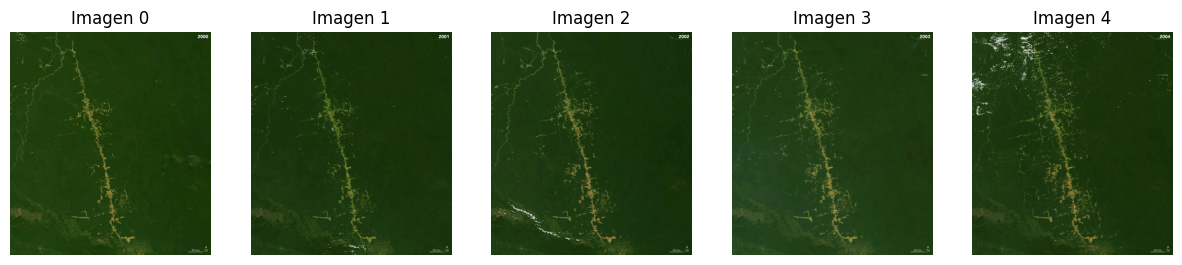

In [5]:
# Convertir de BGR a RGB para mostrar correctamente con matplotlib
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Mostrar las primeras 5 imágenes
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images_rgb[i])
    plt.title(f"Imagen {i}")
    plt.axis('off')
plt.show()

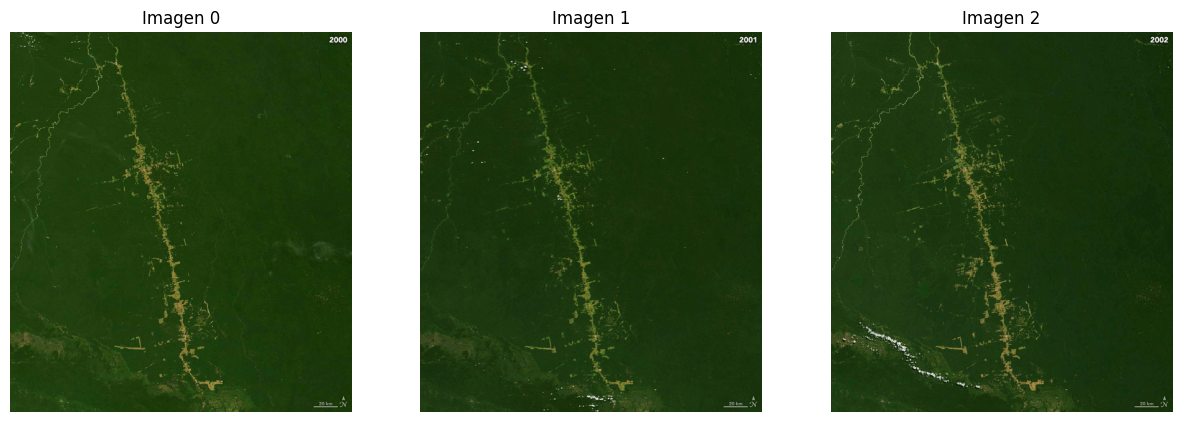

In [6]:
# Convertir todas las imágenes de BGR a RGB
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Mostrar las primeras 3 imágenes convertidas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_rgb[i])
    plt.title(f"Imagen {i}")
    plt.axis('off')
plt.show()


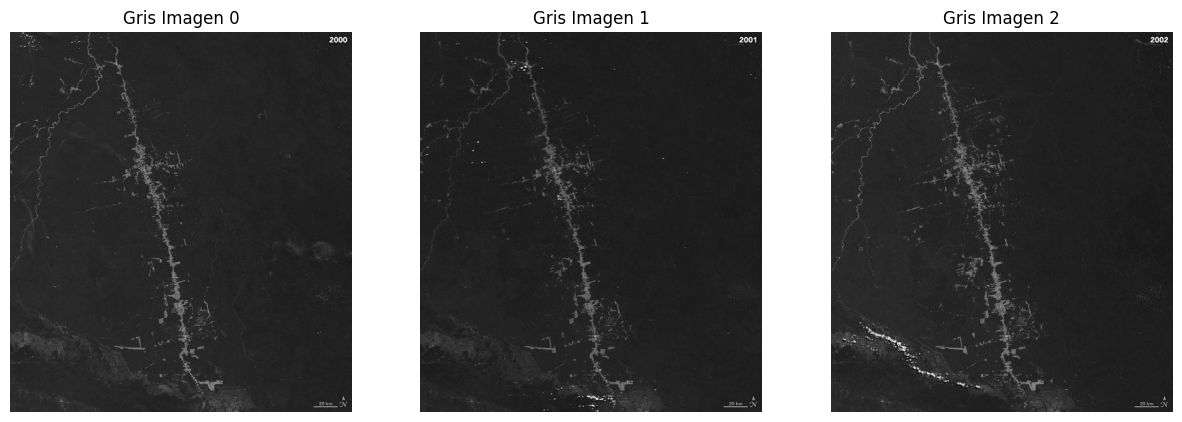

In [7]:
# Convertir todas las imágenes a escala de grises
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

# Mostrar las primeras 3 imágenes en escala de grises
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_gray[i], cmap='gray')
    plt.title(f"Gris Imagen {i}")
    plt.axis('off')
plt.show()


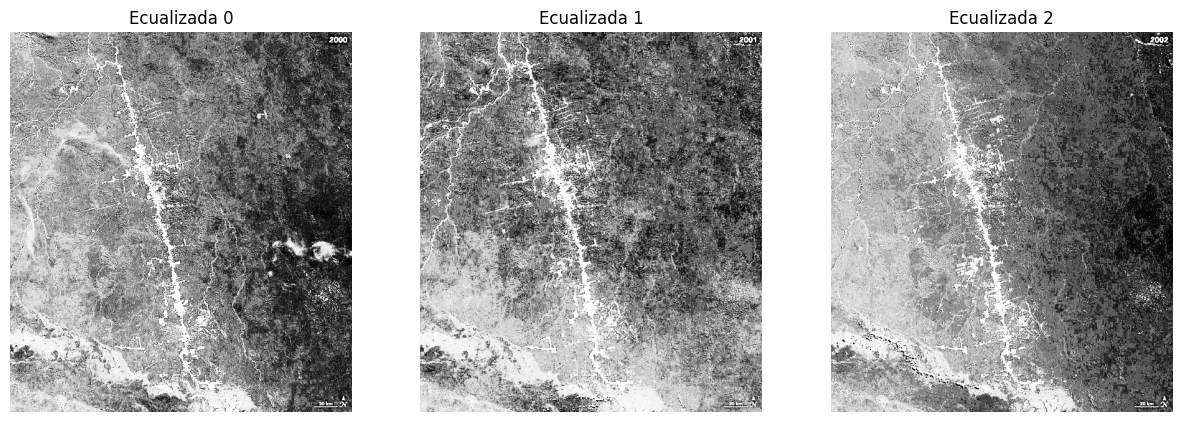

In [8]:
# Aplicar ecualización del histograma a las imágenes en escala de grises
images_equalized = [cv2.equalizeHist(img) for img in images_gray]

# Mostrar las primeras 3 imágenes ecualizadas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_equalized[i], cmap='gray')
    plt.title(f"Ecualizada {i}")
    plt.axis('off')
plt.show()


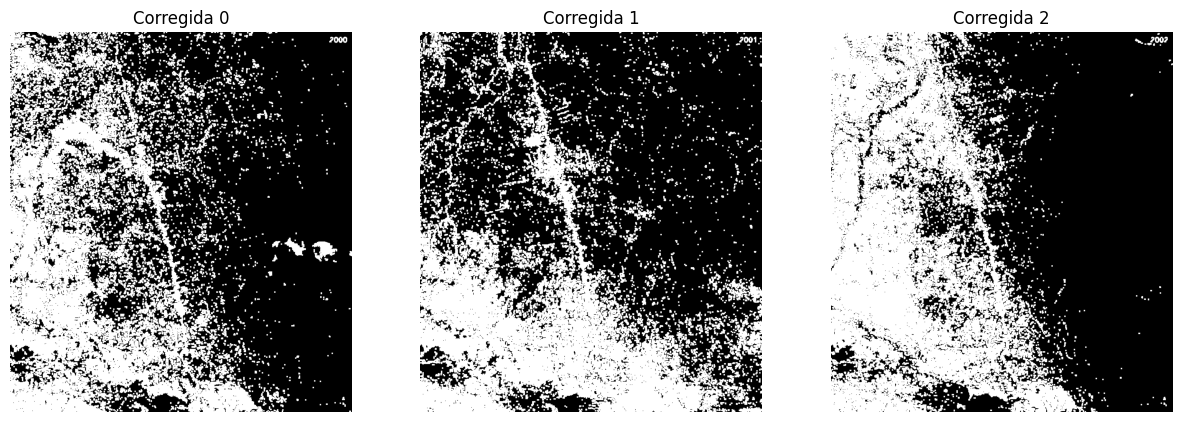

In [13]:
# Segmentar con un umbral fijo (ajústalo si es necesario)
fixed_threshold = 120

images_corrected = []
for img in images_equalized:
    _, thresholded = cv2.threshold(img, fixed_threshold, 255, cv2.THRESH_BINARY)
    # Aplicar apertura morfológica para eliminar ruido
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)
    images_corrected.append(cleaned)

# Mostrar las primeras 3 imágenes segmentadas con el umbral fijo
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_corrected[i], cmap='gray')
    plt.title(f"Corregida {i}")
    plt.axis('off')
plt.show()


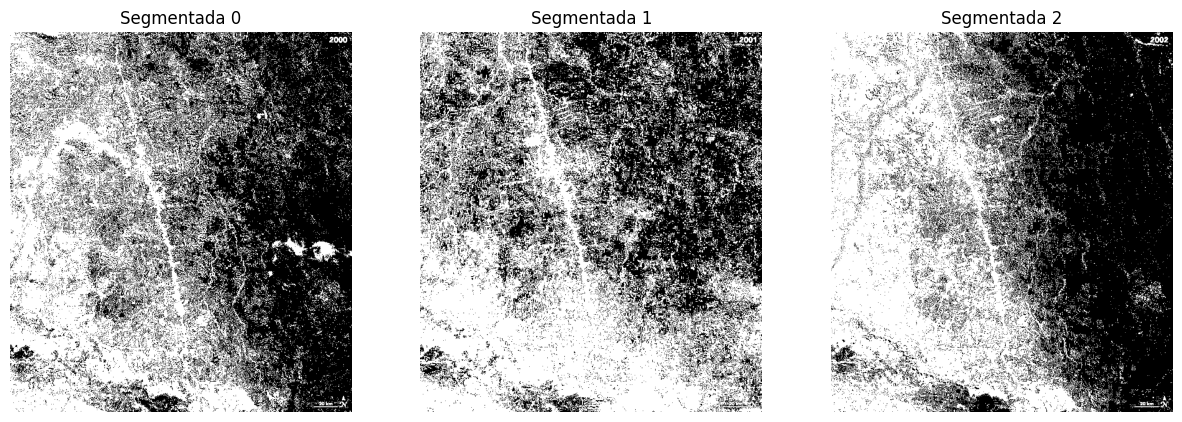

In [12]:
# Aplicar la umbralización de Otsu
images_thresholded = []
for img in images_equalized:
    _, thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    images_thresholded.append(thresholded)

# Mostrar las primeras 3 imágenes segmentadas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_thresholded[i], cmap='gray')
    plt.title(f"Segmentada {i}")
    plt.axis('off')
plt.show()


In [15]:
# Definir la escala: cuántos km² representa cada píxel (ajustar si se tiene la escala real)
km_per_pixel = 0.0001  # Ejemplo: 0.0001 km² por píxel

# Calcular el área deforestada en cada imagen
areas_deforestadas = []
for i, img in enumerate(images_corrected):
    # Contar píxeles blancos (valor 255)
    num_white_pixels = cv2.countNonZero(img)
    # Calcular el área deforestada en km²
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada = {area_deforestada:.2f} km²")


Año 2000: Área deforestada = 21.84 km²
Año 2001: Área deforestada = 21.17 km²
Año 2002: Área deforestada = 24.09 km²
Año 2003: Área deforestada = 23.95 km²
Año 2004: Área deforestada = 25.05 km²
Año 2005: Área deforestada = 22.40 km²
Año 2006: Área deforestada = 22.01 km²
Año 2007: Área deforestada = 25.42 km²
Año 2008: Área deforestada = 24.48 km²
Año 2009: Área deforestada = 23.66 km²
Año 2010: Área deforestada = 24.53 km²
Año 2011: Área deforestada = 21.54 km²
Año 2012: Área deforestada = 20.94 km²
Año 2013: Área deforestada = 22.98 km²
Año 2014: Área deforestada = 23.53 km²
Año 2015: Área deforestada = 25.51 km²
Año 2016: Área deforestada = 22.63 km²
Año 2017: Área deforestada = 25.20 km²
Año 2018: Área deforestada = 25.40 km²
Año 2019: Área deforestada = 22.06 km²


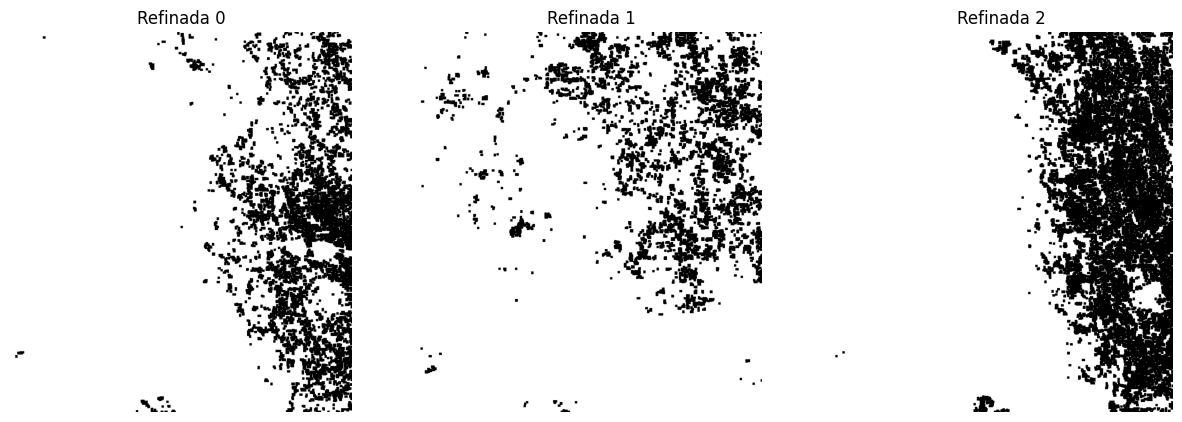

Año 2000: Área deforestada = 48.78 km²
Año 2001: Área deforestada = 49.28 km²
Año 2002: Área deforestada = 42.38 km²
Año 2003: Área deforestada = 42.61 km²
Año 2004: Área deforestada = 46.61 km²
Año 2005: Área deforestada = 46.45 km²
Año 2006: Área deforestada = 45.46 km²
Año 2007: Área deforestada = 46.33 km²
Año 2008: Área deforestada = 41.33 km²
Año 2009: Área deforestada = 43.52 km²
Año 2010: Área deforestada = 48.76 km²
Año 2011: Área deforestada = 52.68 km²
Año 2012: Área deforestada = 50.20 km²
Año 2013: Área deforestada = 45.43 km²
Año 2014: Área deforestada = 42.93 km²
Año 2015: Área deforestada = 44.86 km²
Año 2016: Área deforestada = 46.17 km²
Año 2017: Área deforestada = 41.58 km²
Año 2018: Área deforestada = 44.44 km²
Año 2019: Área deforestada = 46.49 km²


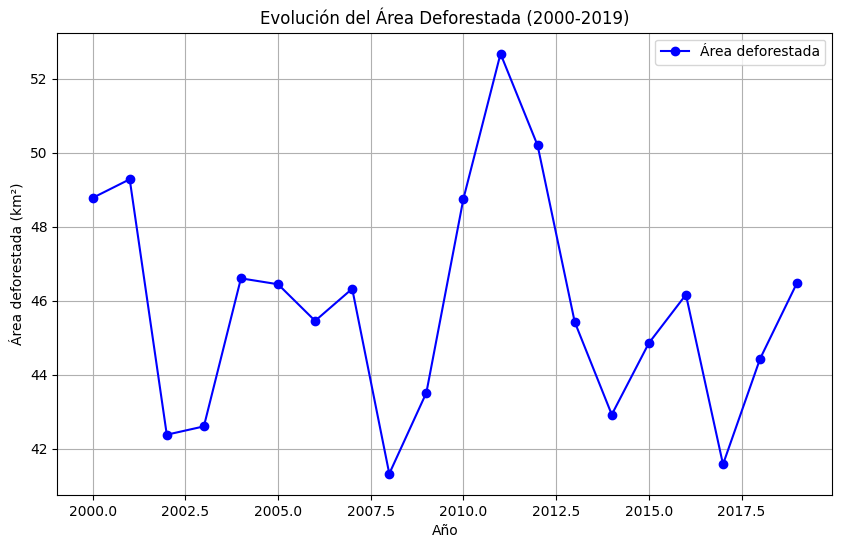

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar las imágenes
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]

# Lista para almacenar imágenes originales y procesadas
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"Error al cargar la imagen {file}")

# Paso 2: Convertir a escala de grises
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]

# Paso 3: Ecualización del histograma
images_equalized = [cv2.equalizeHist(img) for img in images_gray]

# Paso 4: Segmentación con umbral ajustado y cierre morfológico
adjusted_threshold = 115  # Umbral ajustado para separar vegetación y deforestación
images_refined = []
for img in images_equalized:
    # Umbralización con el nuevo umbral ajustado
    _, thresholded = cv2.threshold(img, adjusted_threshold, 255, cv2.THRESH_BINARY)
    
    # Aplicar cierre morfológico para rellenar huecos
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    refined = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)
    
    images_refined.append(refined)

# Visualizar las primeras 3 imágenes refinadas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_refined[i], cmap='gray')
    plt.title(f"Refinada {i}")
    plt.axis('off')
plt.show()

# Paso 5: Cálculo del área deforestada
km_per_pixel = 0.0001  # Ajusta este valor si tienes una escala específica

areas_deforestadas = []
for i, img in enumerate(images_refined):
    num_white_pixels = cv2.countNonZero(img)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada = {area_deforestada:.2f} km²")

# Visualizar la evolución del área deforestada a lo largo de los años
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(len(areas_deforestadas))]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada')
plt.title('Evolución del Área Deforestada (2000-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


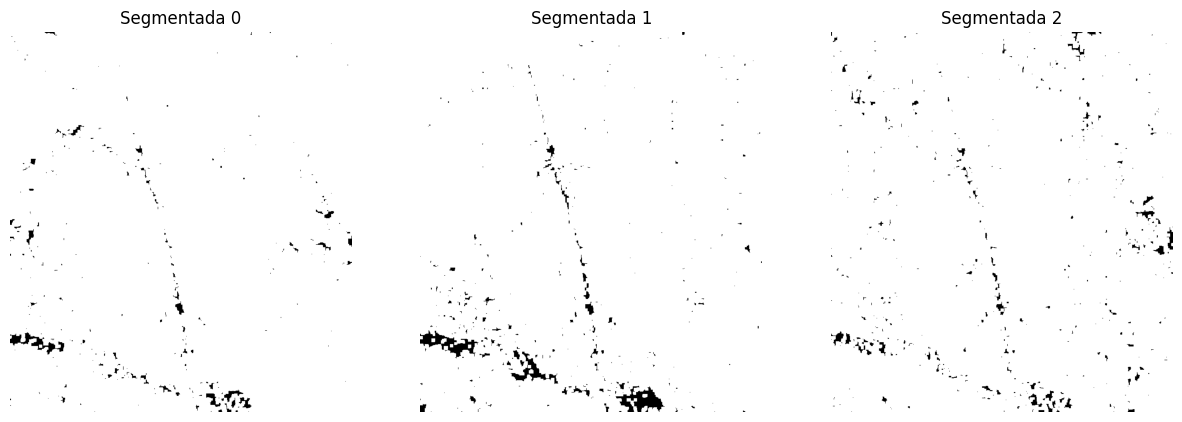

Año 2000: Área deforestada = 56.95 km²
Año 2001: Área deforestada = 56.46 km²
Año 2002: Área deforestada = 56.77 km²
Año 2003: Área deforestada = 55.12 km²
Año 2004: Área deforestada = 56.67 km²
Año 2005: Área deforestada = 54.86 km²
Año 2006: Área deforestada = 56.00 km²
Año 2007: Área deforestada = 56.93 km²
Año 2008: Área deforestada = 55.90 km²
Año 2009: Área deforestada = 56.44 km²
Año 2010: Área deforestada = 56.55 km²
Año 2011: Área deforestada = 55.80 km²
Año 2012: Área deforestada = 55.98 km²
Año 2013: Área deforestada = 55.94 km²
Año 2014: Área deforestada = 56.91 km²
Año 2015: Área deforestada = 56.28 km²
Año 2016: Área deforestada = 56.77 km²
Año 2017: Área deforestada = 56.63 km²
Año 2018: Área deforestada = 55.26 km²
Año 2019: Área deforestada = 56.59 km²


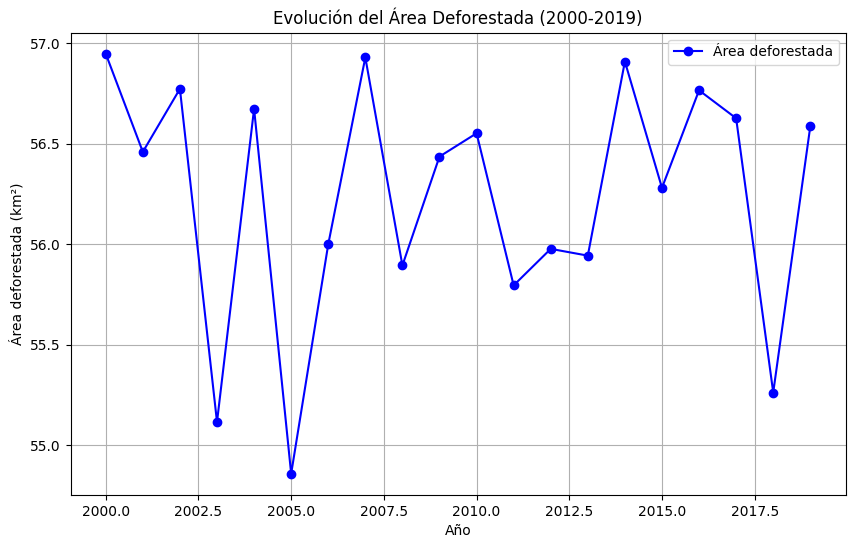

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar las imágenes
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = [cv2.imread(file) for file in image_files if cv2.imread(file) is not None]

# Paso 2: Convertir a escala de grises
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]

# Paso 3: Ecualización del histograma
images_equalized = [cv2.equalizeHist(img) for img in images_gray]

# Paso 4: Detección de bordes con Canny y dilatación
images_edges = []
for img in images_equalized:
    edges = cv2.Canny(img, 50, 150)  # Ajustar umbrales si es necesario
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)  # Conectar regiones
    cleaned = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)  # Eliminar ruido
    images_edges.append(cleaned)

# Mostrar las primeras 3 imágenes segmentadas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images_edges[i], cmap='gray')
    plt.title(f"Segmentada {i}")
    plt.axis('off')
plt.show()

# Paso 5: Cálculo del área deforestada
km_per_pixel = 0.0001  # Ajusta si es necesario
areas_deforestadas = []
for i, img in enumerate(images_edges):
    num_white_pixels = cv2.countNonZero(img)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada = {area_deforestada:.2f} km²")

# Graficar evolución del área deforestada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(len(areas_deforestadas))]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada')
plt.title('Evolución del Área Deforestada (2000-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2000: Área deforestada acumulada = 56.95 km²
Año 2001: Área deforestada acumulada = 57.21 km²
Año 2002: Área deforestada acumulada = 57.38 km²
Año 2003: Área deforestada acumulada = 57.38 km²
Año 2004: Área deforestada acumulada = 57.41 km²
Año 2005: Área deforestada acumulada = 57.47 km²
Año 2006: Área deforestada acumulada = 57.48 km²
Año 2007: Área deforestada acumulada = 57.49 km²
Año 2008: Área deforestada acumulada = 57.53 km²
Año 2009: Área deforestada acumulada = 57.54 km²
Año 2010: Área deforestada acumulada = 57.54 km²
Año 2011: Área deforestada acumulada = 57.55 km²
Año 2012: Área deforestada acumulada = 57.55 km²
Año 2013: Área deforestada acumulada = 57.55 km²
Año 2014: Área deforestada acumulada = 57.56 km²
Año 2015: Área deforestada acumulada = 57.57 km²
Año 2016: Área deforestada acumulada = 57.57 km²
Año 2017: Área deforestada acumulada = 57.58 km²
Año 2018: Área deforestada acumulada = 57.58 km²
Año 2019: Área deforestada acumulada = 57.58 km²


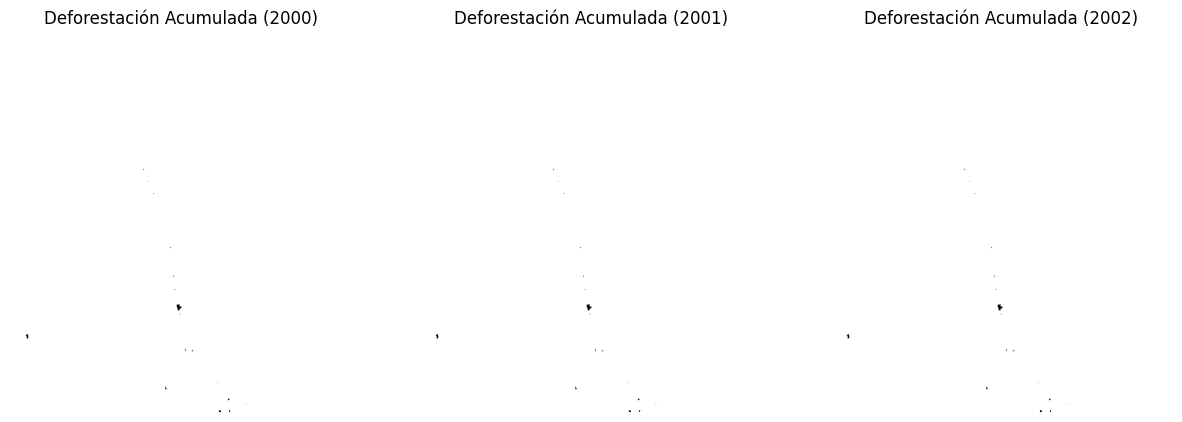

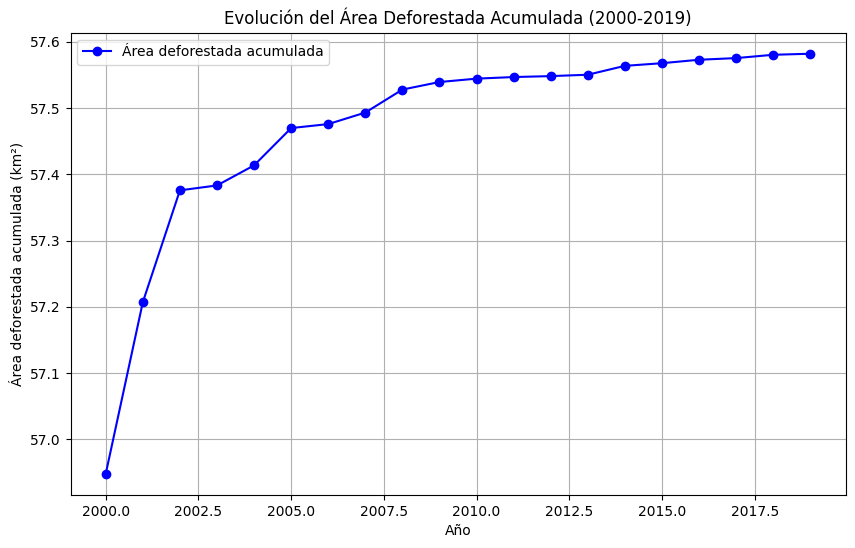

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar las imágenes
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = [cv2.imread(file) for file in image_files if cv2.imread(file) is not None]

# Paso 2: Convertir a escala de grises
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]

# Paso 3: Ecualización del histograma
images_equalized = [cv2.equalizeHist(img) for img in images_gray]

# Paso 4: Detección de bordes y dilatación
adjusted_threshold = 115
cumulative_deforestation = np.zeros_like(images_equalized[0], dtype=np.uint8)
areas_deforestadas = []

for year, img in enumerate(images_equalized):
    # Segmentación con detección de bordes Canny
    edges = cv2.Canny(img, 50, 150)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(edges, kernel, iterations=1)
    cleaned = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
    
    # Actualizar el mapa acumulativo de deforestación
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, cleaned)
    
    # Calcular el área deforestada acumulativa
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    km_per_pixel = 0.0001  # Ajuste según la escala real
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + year}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Mostrar las últimas 3 imágenes acumuladas
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# Graficar la evolución del área deforestada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(len(areas_deforestadas))]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2000-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 2.76 km²
Año 2002: Área deforestada acumulada = 4.17 km²
Año 2003: Área deforestada acumulada = 4.93 km²
Año 2004: Área deforestada acumulada = 7.05 km²
Año 2005: Área deforestada acumulada = 7.93 km²
Año 2006: Área deforestada acumulada = 8.82 km²
Año 2007: Área deforestada acumulada = 9.92 km²
Año 2008: Área deforestada acumulada = 11.23 km²
Año 2009: Área deforestada acumulada = 13.06 km²
Año 2010: Área deforestada acumulada = 13.52 km²
Año 2011: Área deforestada acumulada = 13.91 km²
Año 2012: Área deforestada acumulada = 13.99 km²
Año 2013: Área deforestada acumulada = 14.12 km²
Año 2014: Área deforestada acumulada = 18.18 km²
Año 2015: Área deforestada acumulada = 18.85 km²
Año 2016: Área deforestada acumulada = 19.64 km²
Año 2017: Área deforestada acumulada = 19.93 km²
Año 2018: Área deforestada acumulada = 21.08 km²
Año 2019: Área deforestada acumulada = 21.69 km²


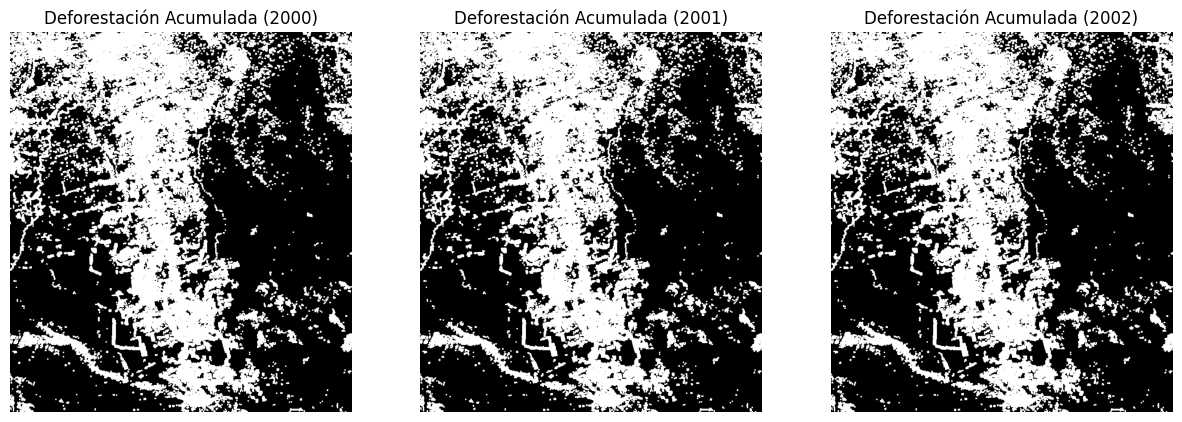

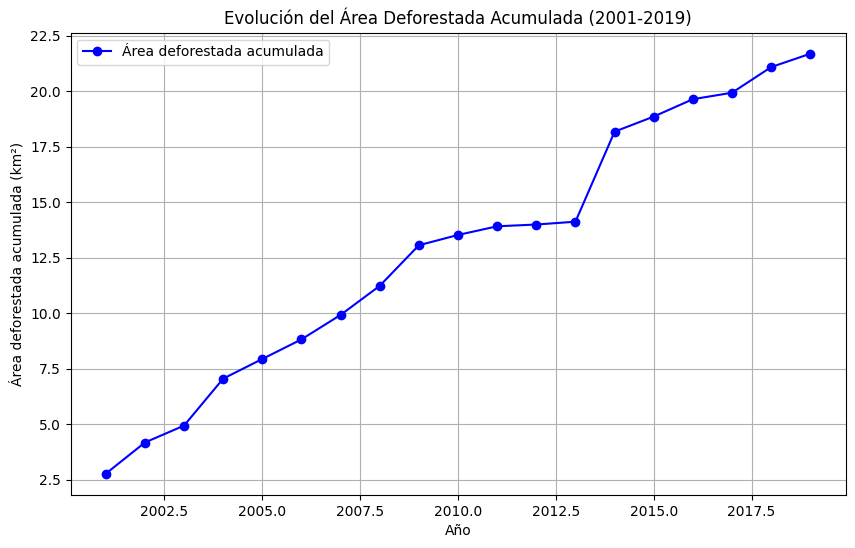

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paso 1: Cargar imágenes originales
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = [cv2.imread(file) for file in image_files if cv2.imread(file) is not None]

# Paso 2: Convertir a escala de grises
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]

# Paso 3: Inicializar variables
cumulative_deforestation = np.zeros_like(images_gray[0], dtype=np.uint8)
areas_deforestadas = []

# Paso 4: Proceso de resta y acumulación
for i in range(1, len(images_gray)):
    # Resta entre imágenes consecutivas
    diff = cv2.absdiff(images_gray[i], images_gray[i-1])
    
    # Umbral adaptativo para destacar diferencias
    _, diff_thresholded = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)
    
    # Dilatación para mejorar la continuidad de las áreas
    kernel = np.ones((3, 3), np.uint8)
    diff_dilated = cv2.dilate(diff_thresholded, kernel, iterations=1)
    
    # Actualizar mapa acumulado
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, diff_dilated)
    
    # Calcular área deforestada
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    km_per_pixel = 0.0001  # Ajuste de escala
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Mostrar algunas imágenes de diferencias y acumulación
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# Graficar la evolución del área deforestada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Cargar imágenes originales
image_files = [f'frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = [cv2.imread(file) for file in image_files if cv2.imread(file) is not None]

# Paso 2: Convertir a escala de grises y aplicar ecualización CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# Paso 3: Inicializar variables
cumulative_deforestation = np.zeros_like(images_gray[0], dtype=np.uint8)
areas_deforestadas = []

# Escala correcta: 0.1 km² por píxel (basado en la barra de escala de 20 km)
km_per_pixel = 0.1 * 0.1  # (km²)

# Paso 4: Proceso de resta, segmentación y acumulación
for i in range(1, len(images_clahe)):
    # Resta entre imágenes consecutivas
    diff = cv2.absdiff(images_clahe[i], images_clahe[i-1])
    
    # Filtro Gaussiano para suavizar el ruido
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)
    
    # Umbral adaptativo para destacar diferencias
    _, diff_thresholded = cv2.threshold(diff_blurred, 25, 255, cv2.THRESH_BINARY)
    
    # Operaciones morfológicas: cierre para eliminar agujeros y ruidos pequeños
    kernel = np.ones((3, 3), np.uint8)
    diff_closed = cv2.morphologyEx(diff_thresholded, cv2.MORPH_CLOSE, kernel)
    
    # Actualizar mapa acumulado
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, diff_closed)
    
    # Calcular área deforestada
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Mostrar algunas imágenes de diferencias y acumulación
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# Graficar la evolución del área deforestada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


[ WARN:0@1.478] global loadsave.cpp:268 findDecoder imread_('frame_00.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.478] global loadsave.cpp:268 findDecoder imread_('frame_01.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_02.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_03.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_04.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_05.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_06.jpg'): can't open/read file: check file path/integrity
[ WARN:0@1.479] global loadsave.cpp:268 findDecoder imread_('frame_07.jpg'): can't open/read file: check file path/integrity


IndexError: list index out of range

Año 2001: Área deforestada acumulada = 964.66 km²
Año 2002: Área deforestada acumulada = 1015.89 km²
Año 2003: Área deforestada acumulada = 1044.59 km²
Año 2004: Área deforestada acumulada = 1146.40 km²
Año 2005: Área deforestada acumulada = 1244.11 km²
Año 2006: Área deforestada acumulada = 1475.41 km²
Año 2007: Área deforestada acumulada = 1613.14 km²
Año 2008: Área deforestada acumulada = 1943.34 km²
Año 2009: Área deforestada acumulada = 2103.61 km²
Año 2010: Área deforestada acumulada = 2126.57 km²
Año 2011: Área deforestada acumulada = 2131.78 km²
Año 2012: Área deforestada acumulada = 2762.24 km²
Año 2013: Área deforestada acumulada = 3058.59 km²
Año 2014: Área deforestada acumulada = 3178.25 km²
Año 2015: Área deforestada acumulada = 3186.24 km²
Año 2016: Área deforestada acumulada = 3292.25 km²
Año 2017: Área deforestada acumulada = 3455.94 km²
Año 2018: Área deforestada acumulada = 3645.46 km²
Año 2019: Área deforestada acumulada = 3717.93 km²


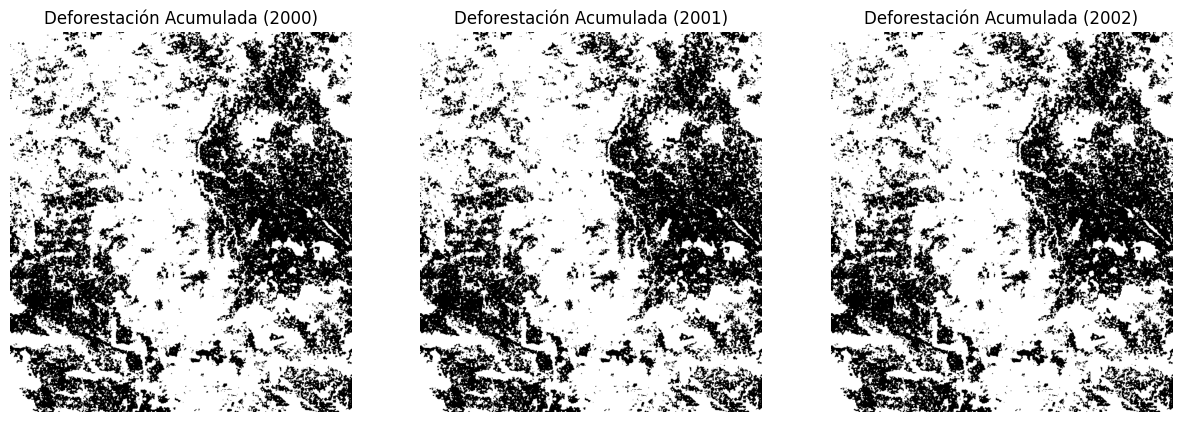

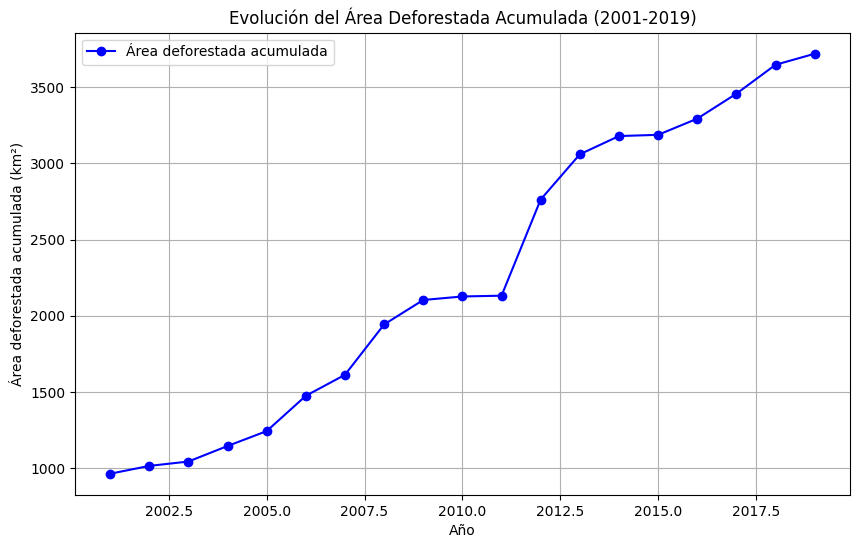

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Cargar imágenes originales
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = [cv2.imread(file) for file in image_files if cv2.imread(file) is not None]

# Paso 2: Convertir a escala de grises y aplicar ecualización CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# Paso 3: Inicializar variables
cumulative_deforestation = np.zeros_like(images_gray[0], dtype=np.uint8)
areas_deforestadas = []

# Escala correcta: 0.1 km² por píxel (basado en la barra de escala de 20 km)
km_per_pixel = 0.1 * 0.1  # (km²)

# Paso 4: Proceso de resta, segmentación con Otsu y acumulación
for i in range(1, len(images_clahe)):
    # Resta entre imágenes consecutivas
    diff = cv2.absdiff(images_clahe[i], images_clahe[i-1])
    
    # Filtro Gaussiano para suavizar el ruido
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)
    
    # Aplicar umbralización Otsu
    _, diff_otsu = cv2.threshold(diff_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Operaciones morfológicas: cierre para eliminar agujeros y ruidos pequeños
    kernel = np.ones((3, 3), np.uint8)
    diff_closed = cv2.morphologyEx(diff_otsu, cv2.MORPH_CLOSE, kernel)
    
    # Actualizar mapa acumulado
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, diff_closed)
    
    # Calcular área deforestada
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Mostrar algunas imágenes de diferencias y acumulación
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# Graficar la evolución del área deforestada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Directorio actual: /Users/miguelangelnavarroarenas/Documents/UNIVERSIDAD/MASTER/VA/actividad3
Año 2001: Área deforestada acumulada = 14835.22 km²
Año 2002: Área deforestada acumulada = 15623.07 km²
Año 2003: Área deforestada acumulada = 16064.44 km²
Año 2004: Área deforestada acumulada = 17630.14 km²
Año 2005: Área deforestada acumulada = 19132.80 km²
Año 2006: Área deforestada acumulada = 22689.89 km²
Año 2007: Área deforestada acumulada = 24808.00 km²
Año 2008: Área deforestada acumulada = 29886.04 km²
Año 2009: Área deforestada acumulada = 32350.79 km²
Año 2010: Área deforestada acumulada = 32703.88 km²
Año 2011: Área deforestada acumulada = 32784.01 km²
Año 2012: Área deforestada acumulada = 42479.66 km²
Año 2013: Área deforestada acumulada = 47037.14 km²
Año 2014: Área deforestada acumulada = 48877.35 km²
Año 2015: Área deforestada acumulada = 49000.23 km²
Año 2016: Área deforestada acumulada = 50630.53 km²
Año 2017: Área deforestada acumulada = 53147.87 km²
Año 2018: Área defores

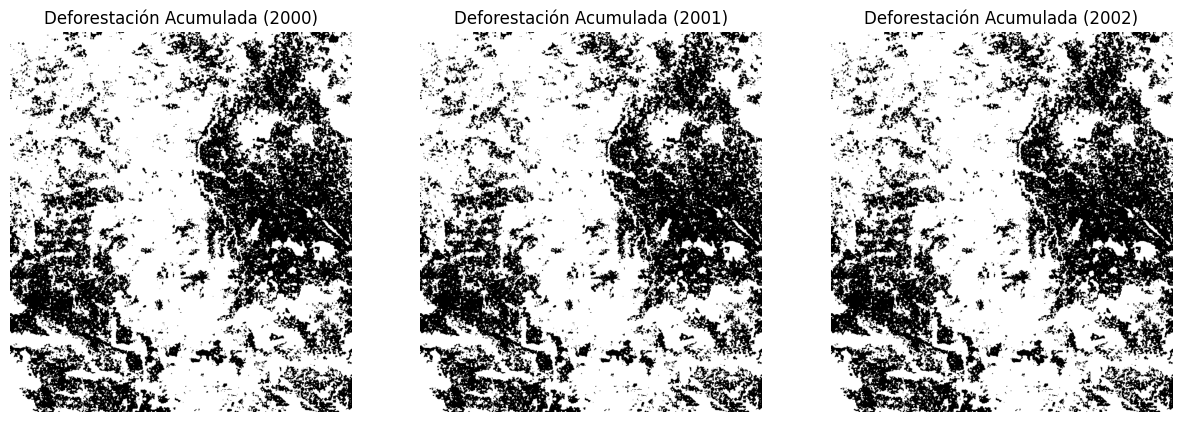

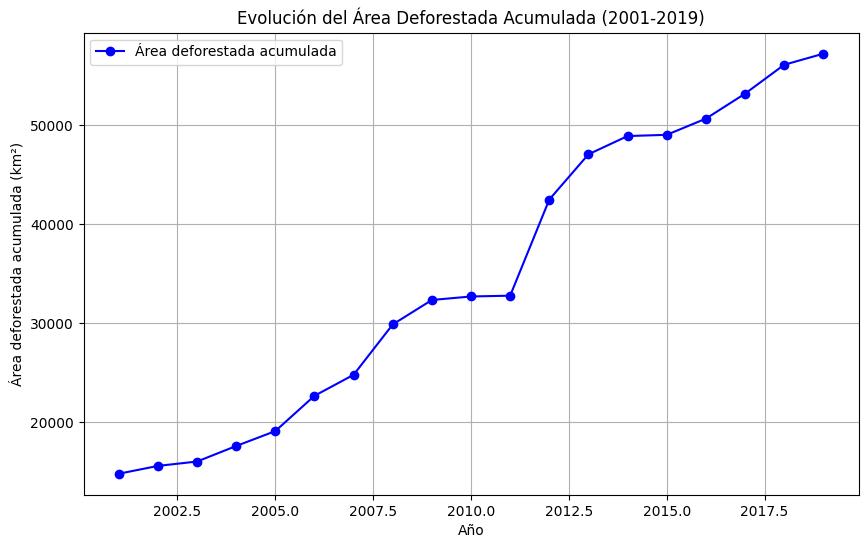

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Verifica la ruta actual para comprobar si las imágenes están en el directorio
print(f"Directorio actual: {os.getcwd()}")

# Paso 1: Cargar imágenes originales y verificar que existan
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []

for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"[WARN] No se pudo cargar la imagen: {file}")

# Verificar si se cargaron imágenes
if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica las rutas o el directorio actual.")

# Paso 2: Convertir a escala de grises y aplicar ecualización CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# Paso 3: Inicializar variables
cumulative_deforestation = np.zeros_like(images_gray[0], dtype=np.uint8)
areas_deforestadas = []

# Escala correcta: 0.1 km² por píxel
km_per_pixel = (20 / 51) ** 2  # (km²)

# Paso 4: Proceso de resta, Otsu y acumulación
for i in range(1, len(images_clahe)):
    diff = cv2.absdiff(images_clahe[i], images_clahe[i-1])
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)
    _, diff_otsu = cv2.threshold(diff_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    diff_closed = cv2.morphologyEx(diff_otsu, cv2.MORPH_CLOSE, kernel)
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, diff_closed)
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Mostrar imágenes de diferencias
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# Graficar la evolución
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


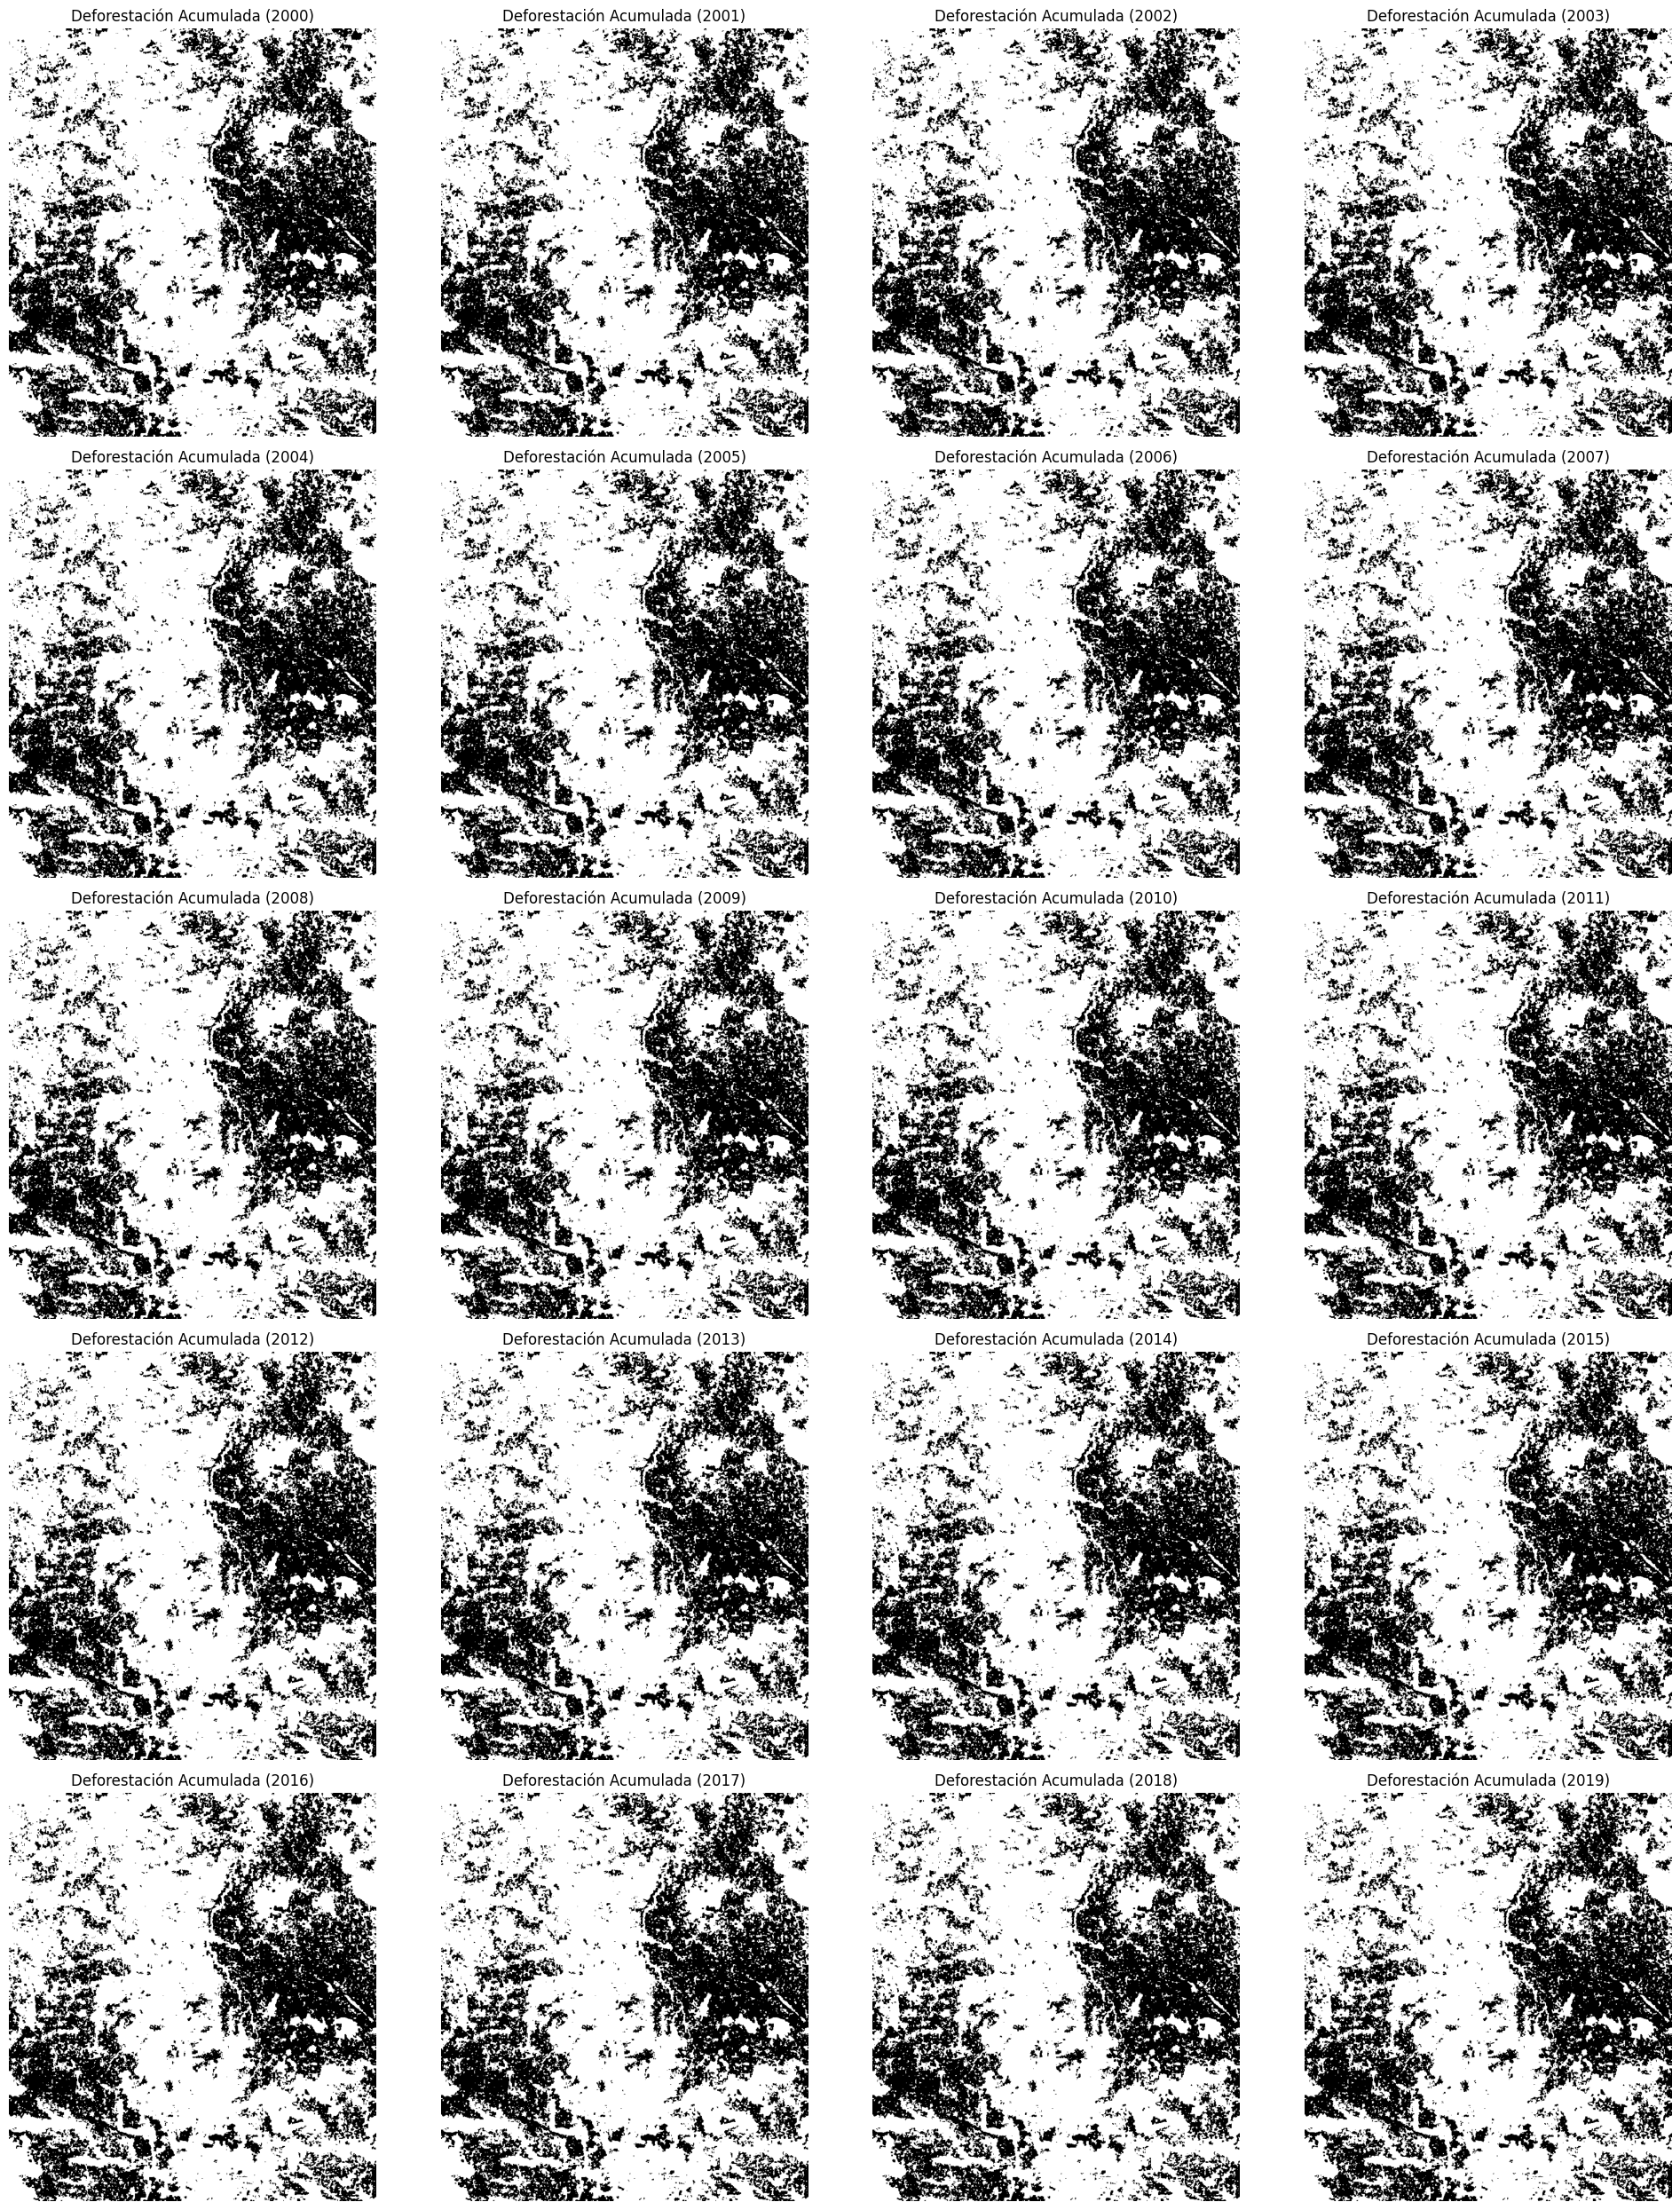

In [9]:
import matplotlib.pyplot as plt

# Mostrar todas las imágenes en filas de 4
num_images = len(images_clahe)
images_per_row = 4
num_rows = (num_images + images_per_row - 1) // images_per_row  # Calcular filas necesarias

plt.figure(figsize=(20, 5 * num_rows))  # Ajustar el tamaño de la figura dinámicamente

for i in range(num_images):
    plt.subplot(num_rows, images_per_row, i+1)  # Distribuir en filas y columnas
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')

plt.tight_layout()  # Ajustar espacios entre imágenes
plt.show()


Directorio actual: /Users/miguelangelnavarroarenas/Documents/UNIVERSIDAD/MASTER/VA/actividad3
Año 2000: Área deforestada inicial = 6112.11 km²
Año 2001: Área deforestada acumulada = 26706.65 km²
Año 2002: Área deforestada acumulada = 36218.53 km²
Año 2003: Área deforestada acumulada = 50459.36 km²
Año 2004: Área deforestada acumulada = 52541.33 km²
Año 2005: Área deforestada acumulada = 56349.40 km²
Año 2006: Área deforestada acumulada = 70373.09 km²
Año 2007: Área deforestada acumulada = 89176.32 km²
Año 2008: Área deforestada acumulada = 104576.24 km²
Año 2009: Área deforestada acumulada = 118040.14 km²
Año 2010: Área deforestada acumulada = 119356.56 km²
Año 2011: Área deforestada acumulada = 134684.51 km²
Año 2012: Área deforestada acumulada = 156632.83 km²
Año 2013: Área deforestada acumulada = 177016.07 km²
Año 2014: Área deforestada acumulada = 180500.88 km²
Año 2015: Área deforestada acumulada = 184005.84 km²
Año 2016: Área deforestada acumulada = 202503.19 km²
Año 2017: Área d

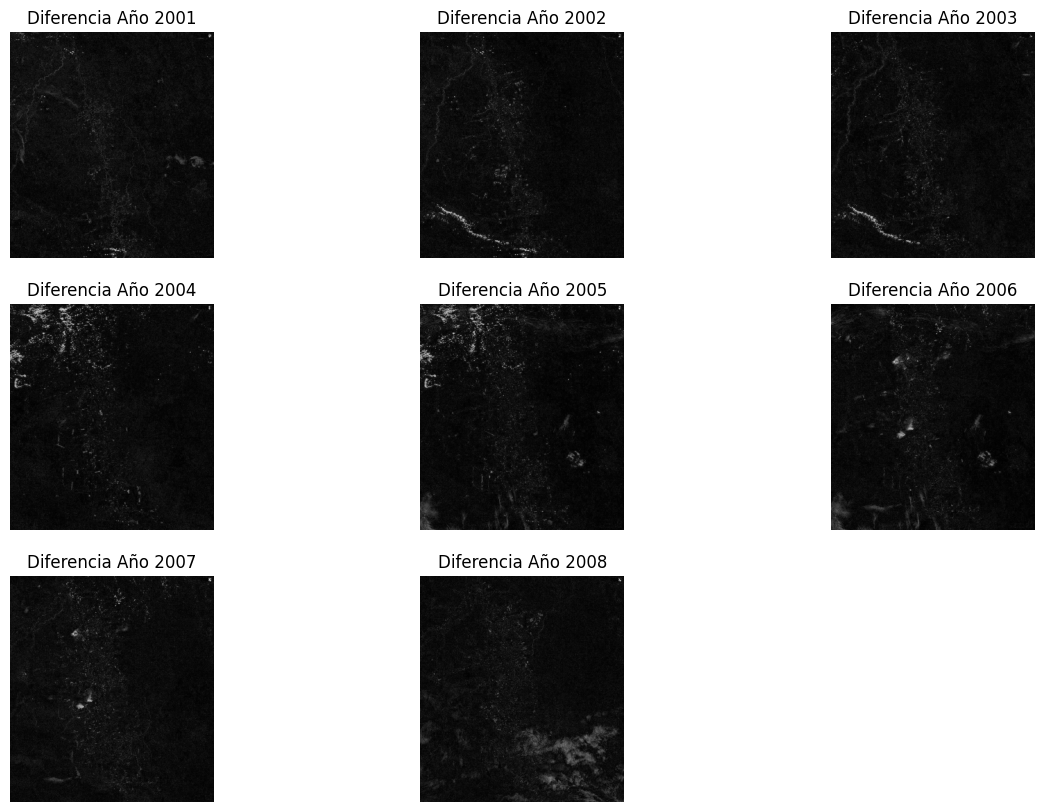

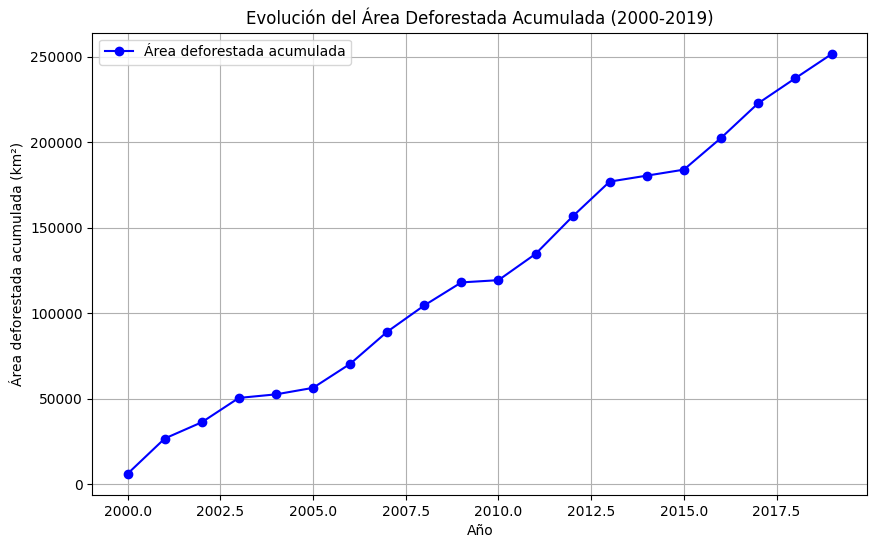

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Verifica el directorio actual
print(f"Directorio actual: {os.getcwd()}")

# Paso 1: Cargar imágenes
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []

for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"[WARN] No se pudo cargar la imagen: {file}")

# Verificar si se cargaron imágenes
if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica las rutas o el directorio actual.")

# Paso 2: Convertir a escala de grises y ecualización CLAHE
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# Escala correcta: 0.1 km² por píxel
km_per_pixel = (20 / 51) ** 2  # (km²)

# Paso 3: Calcular el área de deforestación inicial (año 2000)
_, otsu_initial = cv2.threshold(images_clahe[0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
area_inicial = cv2.countNonZero(otsu_initial) * km_per_pixel
areas_deforestadas = [area_inicial]
print(f"Año 2000: Área deforestada inicial = {area_inicial:.2f} km²")

# Paso 4: Calcular la diferencia progresiva y acumular el área deforestada
for i in range(1, len(images_clahe)):
    # Resta progresiva
    diff = cv2.absdiff(images_clahe[i], images_clahe[i-1])
    _, otsu_diff = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Contamos los píxeles negros (deforestación recién detectada)
    area_diferencia = cv2.countNonZero(otsu_diff) * km_per_pixel
    area_acumulada = areas_deforestadas[-1] + area_diferencia  # Sumamos al área acumulada
    areas_deforestadas.append(area_acumulada)
    
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_acumulada:.2f} km²")

# Mostrar algunas diferencias visuales
plt.figure(figsize=(15, 10))
for i in range(1, 9):
    plt.subplot(3, 3, i)
    plt.imshow(cv2.absdiff(images_clahe[i], images_clahe[i-1]), cmap='gray')
    plt.title(f"Diferencia Año {2000 + i}")
    plt.axis('off')
plt.show()

# Graficar la evolución del área deforestada acumulada
plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(len(areas_deforestadas))]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2000-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: 6368.21 km² acumulados
Año 2002: 7629.16 km² acumulados
Año 2003: 8597.51 km² acumulados
Año 2004: 9988.75 km² acumulados
Año 2005: 11899.73 km² acumulados
Año 2006: 12705.46 km² acumulados
Año 2007: 13460.37 km² acumulados
Año 2008: 16548.84 km² acumulados
Año 2009: 17322.84 km² acumulados
Año 2010: 17878.48 km² acumulados
Año 2011: 18309.21 km² acumulados
Año 2012: 18518.50 km² acumulados
Año 2013: 18892.26 km² acumulados
Año 2014: 20995.13 km² acumulados
Año 2015: 21406.31 km² acumulados
Año 2016: 22194.79 km² acumulados
Año 2017: 22834.04 km² acumulados
Año 2018: 23383.36 km² acumulados
Año 2019: 23804.40 km² acumulados


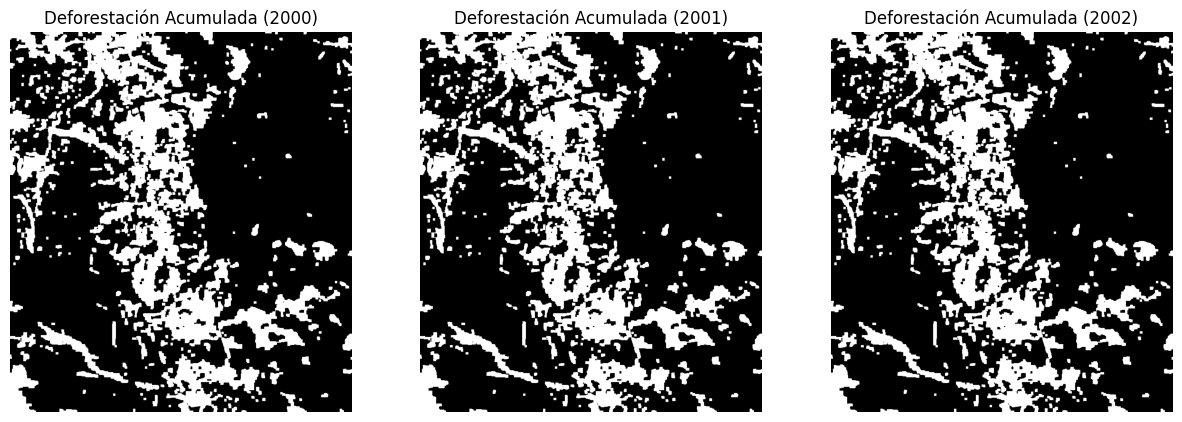

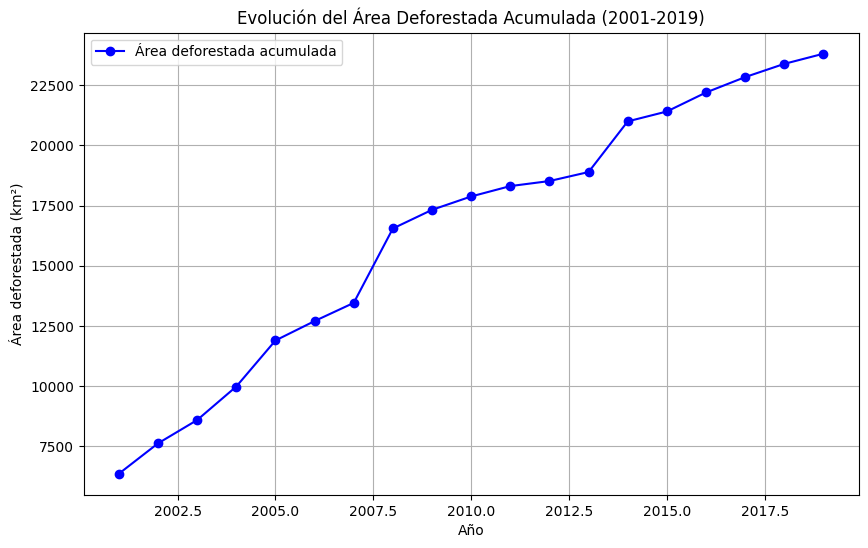

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Lectura de imágenes
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# 2. Ecualización de histograma adaptativa (CLAHE)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# 3. Usar la primera imagen como referencia (baseline)
baseline = images_clahe[0]

# 4. Mapa acumulado y lista para almacenar las áreas deforestadas
cumulative_deforestation = np.zeros_like(baseline, dtype=np.uint8)
areas_deforestadas = []

# Escala revisada (en km²/píxel). Ajustar según la barra de escala correcta.
km_per_pixel = 0.154  

# 5. Para cada año, comparar con la baseline (año 2000)
for i in range(1, len(images_clahe)):
    # Diferencia con la imagen de referencia
    diff = cv2.absdiff(images_clahe[i], baseline)

    # Suavizado para reducir ruido disperso
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)

    # Umbral de Otsu
    _, diff_otsu = cv2.threshold(diff_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operaciones morfológicas: abrir para eliminar partículas pequeñas, luego cerrar para unificar regiones
    kernel = np.ones((3, 3), np.uint8)
    opened = cv2.morphologyEx(diff_otsu, cv2.MORPH_OPEN, kernel, iterations=2)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Combinar con el mapa acumulado (OR)
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, closed)

    # Calcular área deforestada acumulada
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)

    print(f"Año {2000 + i}: {area_deforestada:.2f} km² acumulados")

# 6. Visualización de algunas máscaras finales
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + i})")
    plt.axis('off')
plt.show()

# 7. Gráfica de evolución de la deforestación
years = [2000 + i for i in range(1, len(areas_deforestadas) + 1)]
plt.figure(figsize=(10, 6))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 10312.15 km²
Año 2002: Área deforestada acumulada = 12026.01 km²
Año 2003: Área deforestada acumulada = 13250.62 km²
Año 2004: Área deforestada acumulada = 15092.62 km²
Año 2005: Área deforestada acumulada = 17375.51 km²
Año 2006: Área deforestada acumulada = 18280.11 km²
Año 2007: Área deforestada acumulada = 19065.51 km²
Año 2008: Área deforestada acumulada = 22143.97 km²
Año 2009: Área deforestada acumulada = 23090.76 km²
Año 2010: Área deforestada acumulada = 23701.83 km²
Año 2011: Área deforestada acumulada = 24111.93 km²
Año 2012: Área deforestada acumulada = 24344.78 km²
Año 2013: Área deforestada acumulada = 24714.38 km²
Año 2014: Área deforestada acumulada = 27327.30 km²
Año 2015: Área deforestada acumulada = 27777.75 km²
Año 2016: Área deforestada acumulada = 28371.73 km²
Año 2017: Área deforestada acumulada = 28862.37 km²
Año 2018: Área deforestada acumulada = 29368.42 km²
Año 2019: Área deforestada acumulada = 29823.79 km²


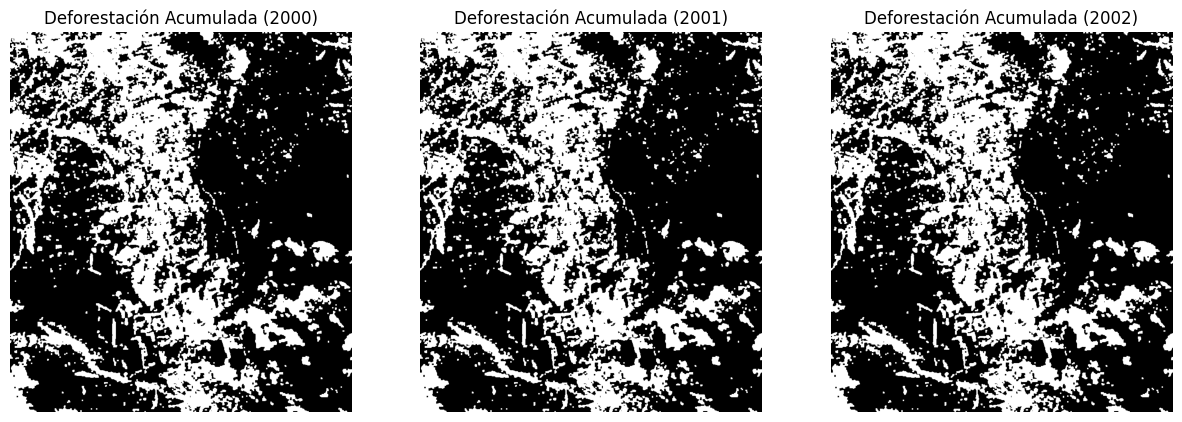

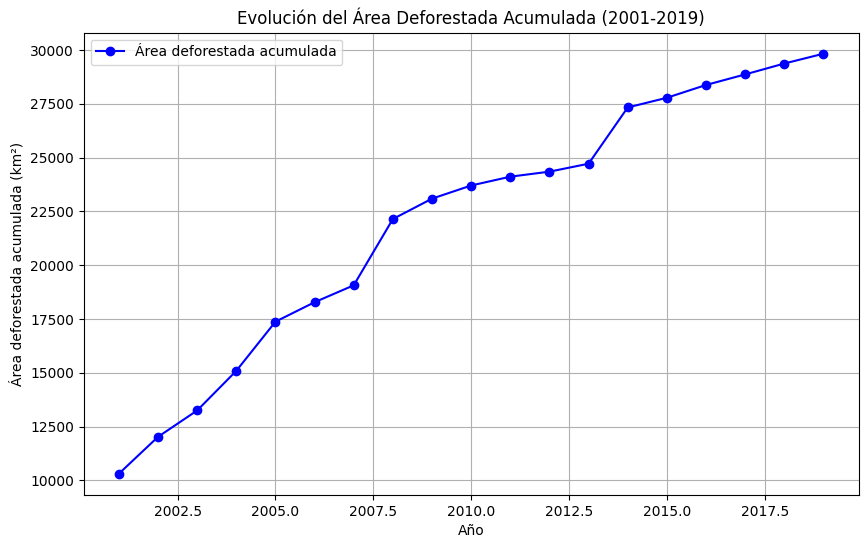

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. CONVERSIÓN A ESCALA DE GRISES, CLAHE
# --------------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# --------------------------------------------------
# 3. DETERMINAR ZONAS "PERMANENTEMENTE CLARAS"
#    (RÍO O OTRAS ZONAS QUE NO SON BOSQUE DESDE EL PRINCIPIO)
# --------------------------------------------------
# Inicializamos la máscara en todo "255" (blanca) para luego hacer intersección (bitwise_and).
common_cleared_mask = np.ones_like(images_clahe[0], dtype=np.uint8) * 255

for i, img_c in enumerate(images_clahe):
    # Un umbral rápido (más relajado que Otsu) para detectar "zonas claras" en cada imagen
    # Ajustar threshold=... según tu histograma; 120 es un ejemplo.
    _, quick_thresh = cv2.threshold(img_c, 120, 255, cv2.THRESH_BINARY)
    
    # Eliminamos pequeños parches usando morphological opening, si fuera necesario
    kernel = np.ones((3, 3), np.uint8)
    opened = cv2.morphologyEx(quick_thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # 'opened' = máscara de zonas claras en la imagen i
    # Intersección con la máscara acumulada
    common_cleared_mask = cv2.bitwise_and(common_cleared_mask, opened)

# En este punto, 'common_cleared_mask' tiene en blanco
# los píxeles que están claros en TODAS las imágenes.
# Invertirla para que sea "zonas a conservar como bosque"
# y que así no se cuenten como deforestación inicial.
common_cleared_mask_inv = cv2.bitwise_not(common_cleared_mask)

# Opcional: visualiza la máscara de zonas claras permanentes
# cv2.imshow("Zonas Claras Comunes", common_cleared_mask)
# cv2.waitKey(0)

# --------------------------------------------------
# 4. CREAR MAPA BASE (BASELINE) EXCLUYENDO ZONAS CLARAS PERMANENTES
# --------------------------------------------------
baseline = images_clahe[0].copy()
# Convertimos a binario con Otsu para ver "bosque" vs "no bosque" en la primera imagen
_, baseline_otsu = cv2.threshold(baseline, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Filtramos la parte que coincide con la máscara invertida "common_cleared_mask_inv".
# Esto significa: en la baseline, descartamos las zonas que son permanentemente claras en TODAS las imágenes
baseline_otsu_filtered = cv2.bitwise_and(baseline_otsu, common_cleared_mask_inv)

# --------------------------------------------------
# 5. MAPA ACUMULADO, LISTA DE ÁREAS, ESCALA
# --------------------------------------------------
cumulative_deforestation = np.zeros_like(baseline, dtype=np.uint8)
areas_deforestadas = []

km_per_pixel = 0.154  # Ajustar según tu escala real

# --------------------------------------------------
# 6. COMPARACIÓN AÑO A AÑO, RESTA CON BASELINE (FILTRADA)
# --------------------------------------------------
for i in range(1, len(images_clahe)):
    # Resta respecto a la baseline (o podrías hacerlo con la imagen previa, según tu metodología)
    diff = cv2.absdiff(images_clahe[i], baseline)
    
    # Filtro Gaussiano
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)
    
    # Otsu
    _, diff_otsu = cv2.threshold(diff_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Eliminamos zonas claras permanentes
    diff_otsu_masked = cv2.bitwise_and(diff_otsu, common_cleared_mask_inv)
    
    # Operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    opened = cv2.morphologyEx(diff_otsu_masked, cv2.MORPH_OPEN, kernel, iterations=1)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel, iterations=1)
    
    # Acumulación
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, closed)

    # Cálculo de área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# --------------------------------------------------
# 7. VISUALIZACIÓN
# --------------------------------------------------
plt.figure(figsize=(15, 5))
for j in range(3):
    plt.subplot(1, 3, j+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada ({2000 + j})")
    plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.plot(years, areas_deforestadas, marker='o', linestyle='-', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada acumulada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: 1799.95 km²
Año 2002: 1936.09 km²
Año 2003: 2085.62 km²
Año 2004: 2100.25 km²
Año 2005: 2159.54 km²
Año 2006: 2175.40 km²
Año 2007: 2201.74 km²
Año 2008: 2256.72 km²
Año 2009: 2275.81 km²
Año 2010: 2294.14 km²
Año 2011: 2314.00 km²
Año 2012: 2323.09 km²
Año 2013: 2332.79 km²
Año 2014: 2360.67 km²
Año 2015: 2367.90 km²
Año 2016: 2393.78 km²
Año 2017: 2414.72 km²
Año 2018: 2430.43 km²
Año 2019: 2478.01 km²


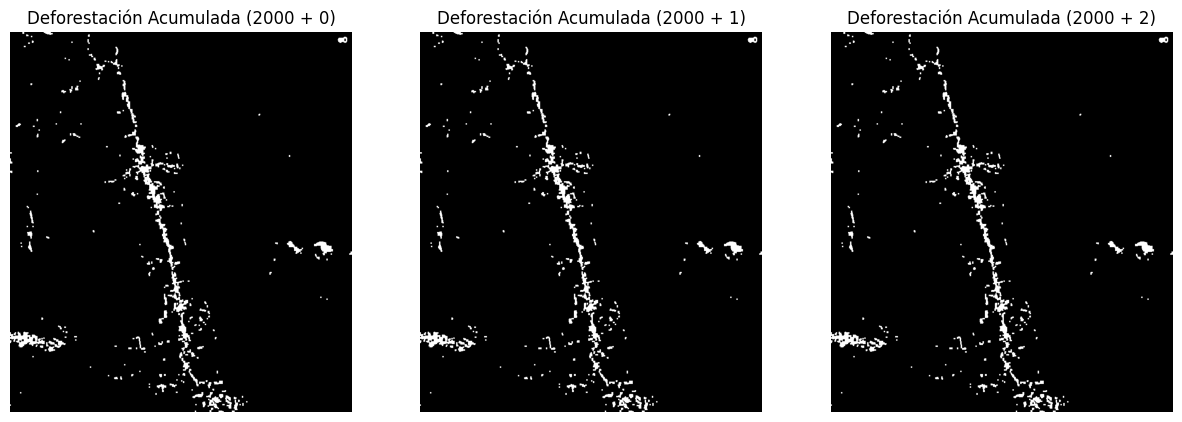

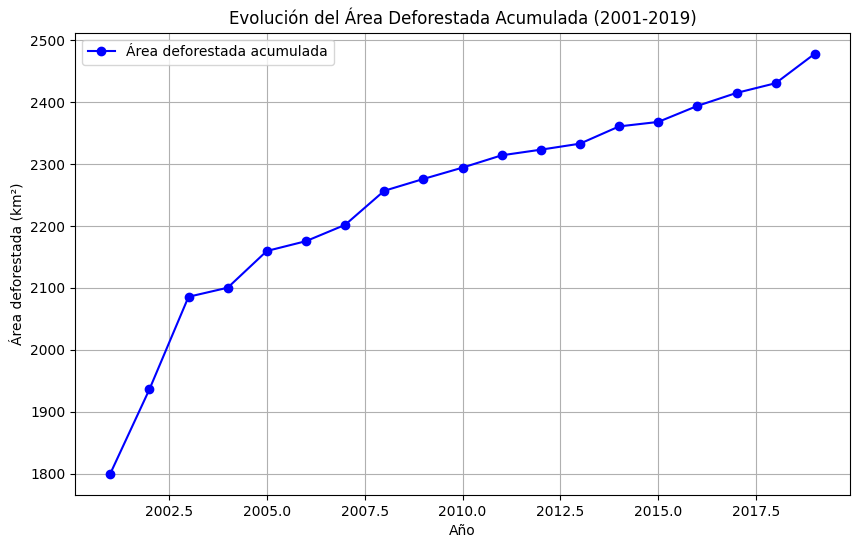

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. PROCESAMIENTO INICIAL (CLAHE) E IMAGEN BASE
# --------------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

# Tomamos la imagen del año 2000 como baseline (índice 0)
baseline = images_clahe[0].copy()

# --------------------------------------------------
# 3. CREAR MÁSCARA DE "BOSQUE EN 2000"
# --------------------------------------------------
# Como el bosque tiende a ser oscuro, el método de Otsu produce un umbral donde
# las regiones oscuras (bosque) están por debajo del umbral.
# Posiblemente necesites invertir el resultado, dependiendo de tu histograma.
_, forest_mask_2000 = cv2.threshold(baseline, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Observa si el bosque quedó en "blanco" (255) o "negro" (0).
# Si quedó invertido, haz: forest_mask_2000 = cv2.bitwise_not(forest_mask_2000)

# Opcional: filtrar ruidos con operaciones morfológicas
kernel = np.ones((3, 3), np.uint8)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_OPEN, kernel, iterations=1)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_CLOSE, kernel, iterations=1)

# --------------------------------------------------
# 4. MAPA DE DEFORESTACIÓN ACUMULADA Y ESCALA
# --------------------------------------------------
cumulative_deforestation = np.zeros_like(baseline, dtype=np.uint8)
areas_deforestadas = []

# Ajusta km_per_pixel según tu barra de escala real.
km_per_pixel = 0.154

# --------------------------------------------------
# 5. PARA CADA AÑO i, COMPARAR IMAGEN i CON AÑO 2000,
#    PERO SOLO DENTRO DE LOS PÍXELES QUE ERAN BOSQUE
# --------------------------------------------------
for i in range(1, len(images_clahe)):
    current_img = images_clahe[i]
    
    # Resta respecto a la baseline
    diff = cv2.absdiff(current_img, baseline)
    
    # Suavizado
    diff_blurred = cv2.GaussianBlur(diff, (5, 5), 0)
    
    # Umbral Otsu para detectar cambios claros
    _, diff_otsu = cv2.threshold(diff_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Restricción a la zona que era bosque en 2000:
    diff_otsu_forest_only = cv2.bitwise_and(diff_otsu, forest_mask_2000)
    
    # Operaciones morfológicas para reducir ruido
    closed = cv2.morphologyEx(diff_otsu_forest_only, cv2.MORPH_CLOSE, kernel, iterations=1)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Unión con el mapa acumulado
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, opened)
    
    # Cálculo de área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    print(f"Año {2000 + i}: {area_deforestada:.2f} km²")

# --------------------------------------------------
# 6. VISUALIZACIÓN
# --------------------------------------------------
plt.figure(figsize=(15, 5))
for idx in range(3):
    plt.subplot(1, 3, idx+1)
    plt.imshow(cumulative_deforestation, cmap='gray')
    plt.title(f"Deforestación Acumulada (2000 + {idx})")
    plt.axis('off')
plt.show()

years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.figure(figsize=(10, 6))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Acumulada = 1799.95 km², Nueva vs. 2000 = 1799.95 km²
Año 2002: Acumulada = 1936.09 km², Nueva vs. 2001 = 73.30 km²
Año 2003: Acumulada = 2085.62 km², Nueva vs. 2002 = 58.37 km²
Año 2004: Acumulada = 2100.25 km², Nueva vs. 2003 = 22.95 km²
Año 2005: Acumulada = 2159.54 km², Nueva vs. 2004 = 55.90 km²
Año 2006: Acumulada = 2175.40 km², Nueva vs. 2005 = 68.38 km²
Año 2007: Acumulada = 2201.74 km², Nueva vs. 2006 = 78.08 km²
Año 2008: Acumulada = 2256.72 km², Nueva vs. 2007 = 112.73 km²
Año 2009: Acumulada = 2275.81 km², Nueva vs. 2008 = 445.21 km²
Año 2010: Acumulada = 2294.14 km², Nueva vs. 2009 = 61.29 km²
Año 2011: Acumulada = 2314.00 km², Nueva vs. 2010 = 10.47 km²
Año 2012: Acumulada = 2323.09 km², Nueva vs. 2011 = 747.98 km²
Año 2013: Acumulada = 2332.79 km², Nueva vs. 2012 = 616.62 km²
Año 2014: Acumulada = 2360.67 km², Nueva vs. 2013 = 60.68 km²
Año 2015: Acumulada = 2367.90 km², Nueva vs. 2014 = 71.76 km²
Año 2016: Acumulada = 2393.78 km², Nueva vs. 2015 = 1330.87 km²


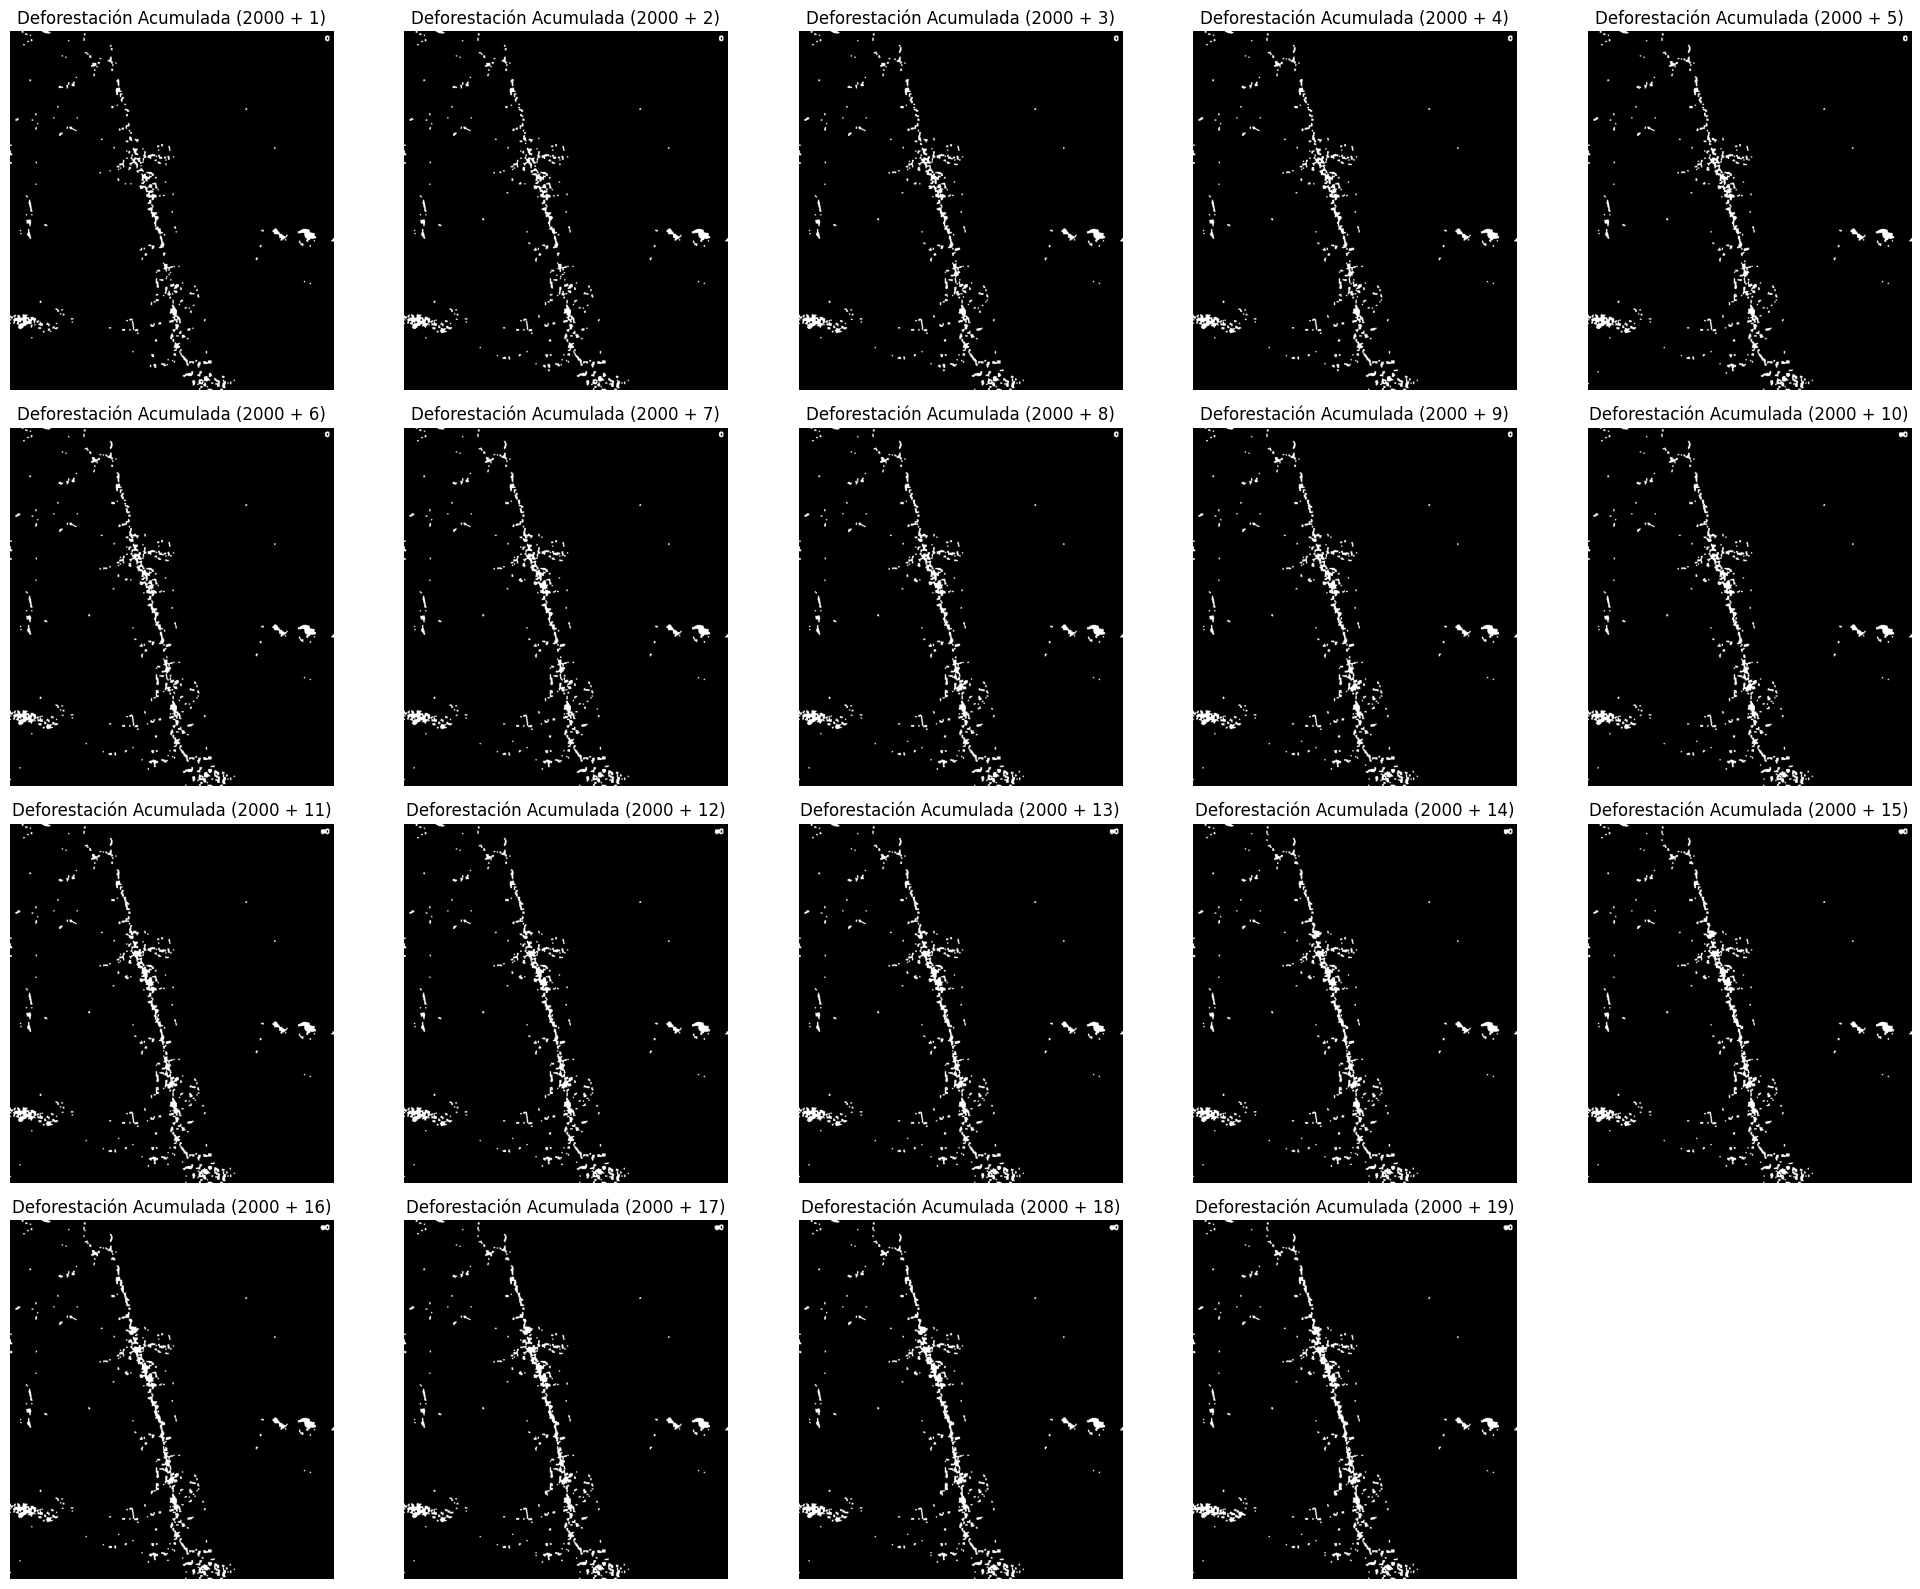

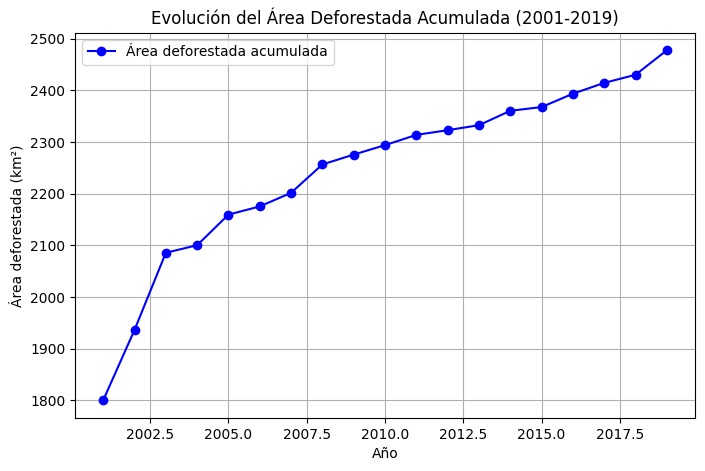

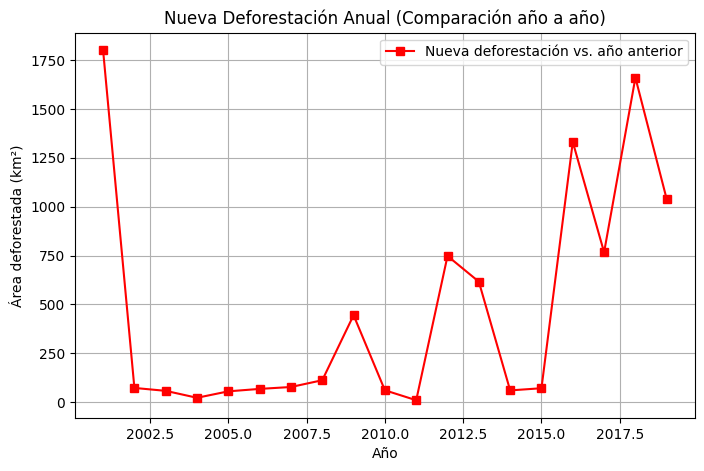

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. PROCESAMIENTO INICIAL (CLAHE) E IMAGEN BASE
# --------------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

baseline = images_clahe[0].copy()  # Año 2000 como baseline

# --------------------------------------------------
# 3. CREAR MÁSCARA DE "BOSQUE EN 2000"
#    para no contar lo que ya era "no-bosque" en ese año
# --------------------------------------------------
_, forest_mask_2000 = cv2.threshold(baseline, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Invertir si hace falta, dependiendo de cómo salga Otsu:
# forest_mask_2000 = cv2.bitwise_not(forest_mask_2000)

kernel = np.ones((3, 3), np.uint8)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_OPEN, kernel, iterations=1)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_CLOSE, kernel, iterations=1)

# --------------------------------------------------
# 4. MAPA DE DEFORESTACIÓN ACUMULADA Y LISTAS PARA ALMACENAR ÁREAS
# --------------------------------------------------
cumulative_deforestation = np.zeros_like(baseline, dtype=np.uint8)
areas_deforestadas = []      # Comparación con baseline (2000)
areas_deforestadas_yearly = []  # Comparación año a año

# Para visualizar TODAS las imágenes de deforestación
cumulative_snapshots = []  # Irá guardando el estado de deforestación acumulada en cada año

# Escala (km² por píxel)
km_per_pixel = 0.154

# --------------------------------------------------
# 5. BUCLE PRINCIPAL: AÑO i (2001--2019)
#    - COMPARAR i VS. BASELINE (2000)
#    - COMPARAR i VS. (i - 1)
# --------------------------------------------------
for i in range(1, len(images_clahe)):
    current_img = images_clahe[i]
    
    # -------------------------
    # 5A. Comparación con baseline (año 2000)
    # -------------------------
    diff_base = cv2.absdiff(current_img, baseline)
    diff_base_blurred = cv2.GaussianBlur(diff_base, (5, 5), 0)
    _, diff_base_otsu = cv2.threshold(diff_base_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Aplicar la máscara de bosque en 2000, para solo contar píxeles que en 2000 eran bosque
    diff_base_masked = cv2.bitwise_and(diff_base_otsu, forest_mask_2000)
    
    # Operaciones morfológicas
    closed_base = cv2.morphologyEx(diff_base_masked, cv2.MORPH_CLOSE, kernel, iterations=1)
    opened_base = cv2.morphologyEx(closed_base, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Actualizar deforestación acumulada
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, opened_base)
    
    # Calcular área acumulada
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    # -------------------------
    # 5B. Comparación con la imagen del año anterior (i-1)
    #     (para verificar consistencia año a año)
    # -------------------------
    prev_img = images_clahe[i-1]
    diff_yearly = cv2.absdiff(current_img, prev_img)
    diff_yearly_blurred = cv2.GaussianBlur(diff_yearly, (5, 5), 0)
    _, diff_yearly_otsu = cv2.threshold(diff_yearly_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Para una rápida estimación del cambio de un año a otro
    # (sin actualizar el 'cumulative_deforestation'):
    diff_yearly_otsu_masked = cv2.bitwise_and(diff_yearly_otsu, forest_mask_2000)
    closed_yearly = cv2.morphologyEx(diff_yearly_otsu_masked, cv2.MORPH_CLOSE, kernel, iterations=1)
    opened_yearly = cv2.morphologyEx(closed_yearly, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Cálculo de área "nueva" deforestada año a año
    # (opcional, para ver la magnitud de cambio adicional en i)
    num_white_yearly = cv2.countNonZero(opened_yearly)
    area_yearly = num_white_yearly * km_per_pixel
    areas_deforestadas_yearly.append(area_yearly)
    
    # Imprimir en consola
    print(f"Año {2000 + i}: Acumulada = {area_deforestada:.2f} km², "
          f"Nueva vs. {2000 + i - 1} = {area_yearly:.2f} km²")
    
    # Guardar instantánea del mapa de deforestación acumulada
    cumulative_snapshots.append(cumulative_deforestation.copy())

# --------------------------------------------------
# 6. MOSTRAR TODAS LAS IMÁGENES DE DEFORESTACIÓN ACUMULADA
# --------------------------------------------------
num_images = len(cumulative_snapshots)
cols = 5
rows = int(np.ceil(num_images / cols))

plt.figure(figsize=(4*cols, 4*rows))
for idx, cdef in enumerate(cumulative_snapshots):
    plt.subplot(rows, cols, idx+1)
    plt.imshow(cdef, cmap='gray')
    plt.title(f"Deforestación Acumulada (2000 + {idx+1})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 7. GRAFICAR EVOLUCIÓN DEL ÁREA ACUMULADA
# --------------------------------------------------
years = [2000 + i for i in range(1, len(areas_deforestadas)+1)]
plt.figure(figsize=(8,5))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()

# Opcional: si quieres también ver la evolución año a año:
plt.figure(figsize=(8,5))
plt.plot(years, areas_deforestadas_yearly, marker='s', color='r', label='Nueva deforestación vs. año anterior')
plt.title('Nueva Deforestación Anual (Comparación año a año)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 1858.78 km²
Año 2002: Área deforestada acumulada = 2007.70 km²
Año 2003: Área deforestada acumulada = 2174.02 km²
Año 2004: Área deforestada acumulada = 2190.34 km²
Año 2005: Área deforestada acumulada = 2258.10 km²
Año 2006: Área deforestada acumulada = 2293.06 km²
Año 2007: Área deforestada acumulada = 2335.87 km²
Año 2008: Área deforestada acumulada = 2414.72 km²
Año 2009: Área deforestada acumulada = 2513.43 km²
Año 2010: Área deforestada acumulada = 2529.30 km²
Año 2011: Área deforestada acumulada = 2550.86 km²
Año 2012: Área deforestada acumulada = 2741.05 km²
Año 2013: Área deforestada acumulada = 2813.27 km²
Año 2014: Área deforestada acumulada = 2822.51 km²
Año 2015: Área deforestada acumulada = 2827.59 km²
Año 2016: Área deforestada acumulada = 2970.20 km²
Año 2017: Área deforestada acumulada = 3023.33 km²
Año 2018: Área deforestada acumulada = 3118.96 km²
Año 2019: Área deforestada acumulada = 3142.99 km²


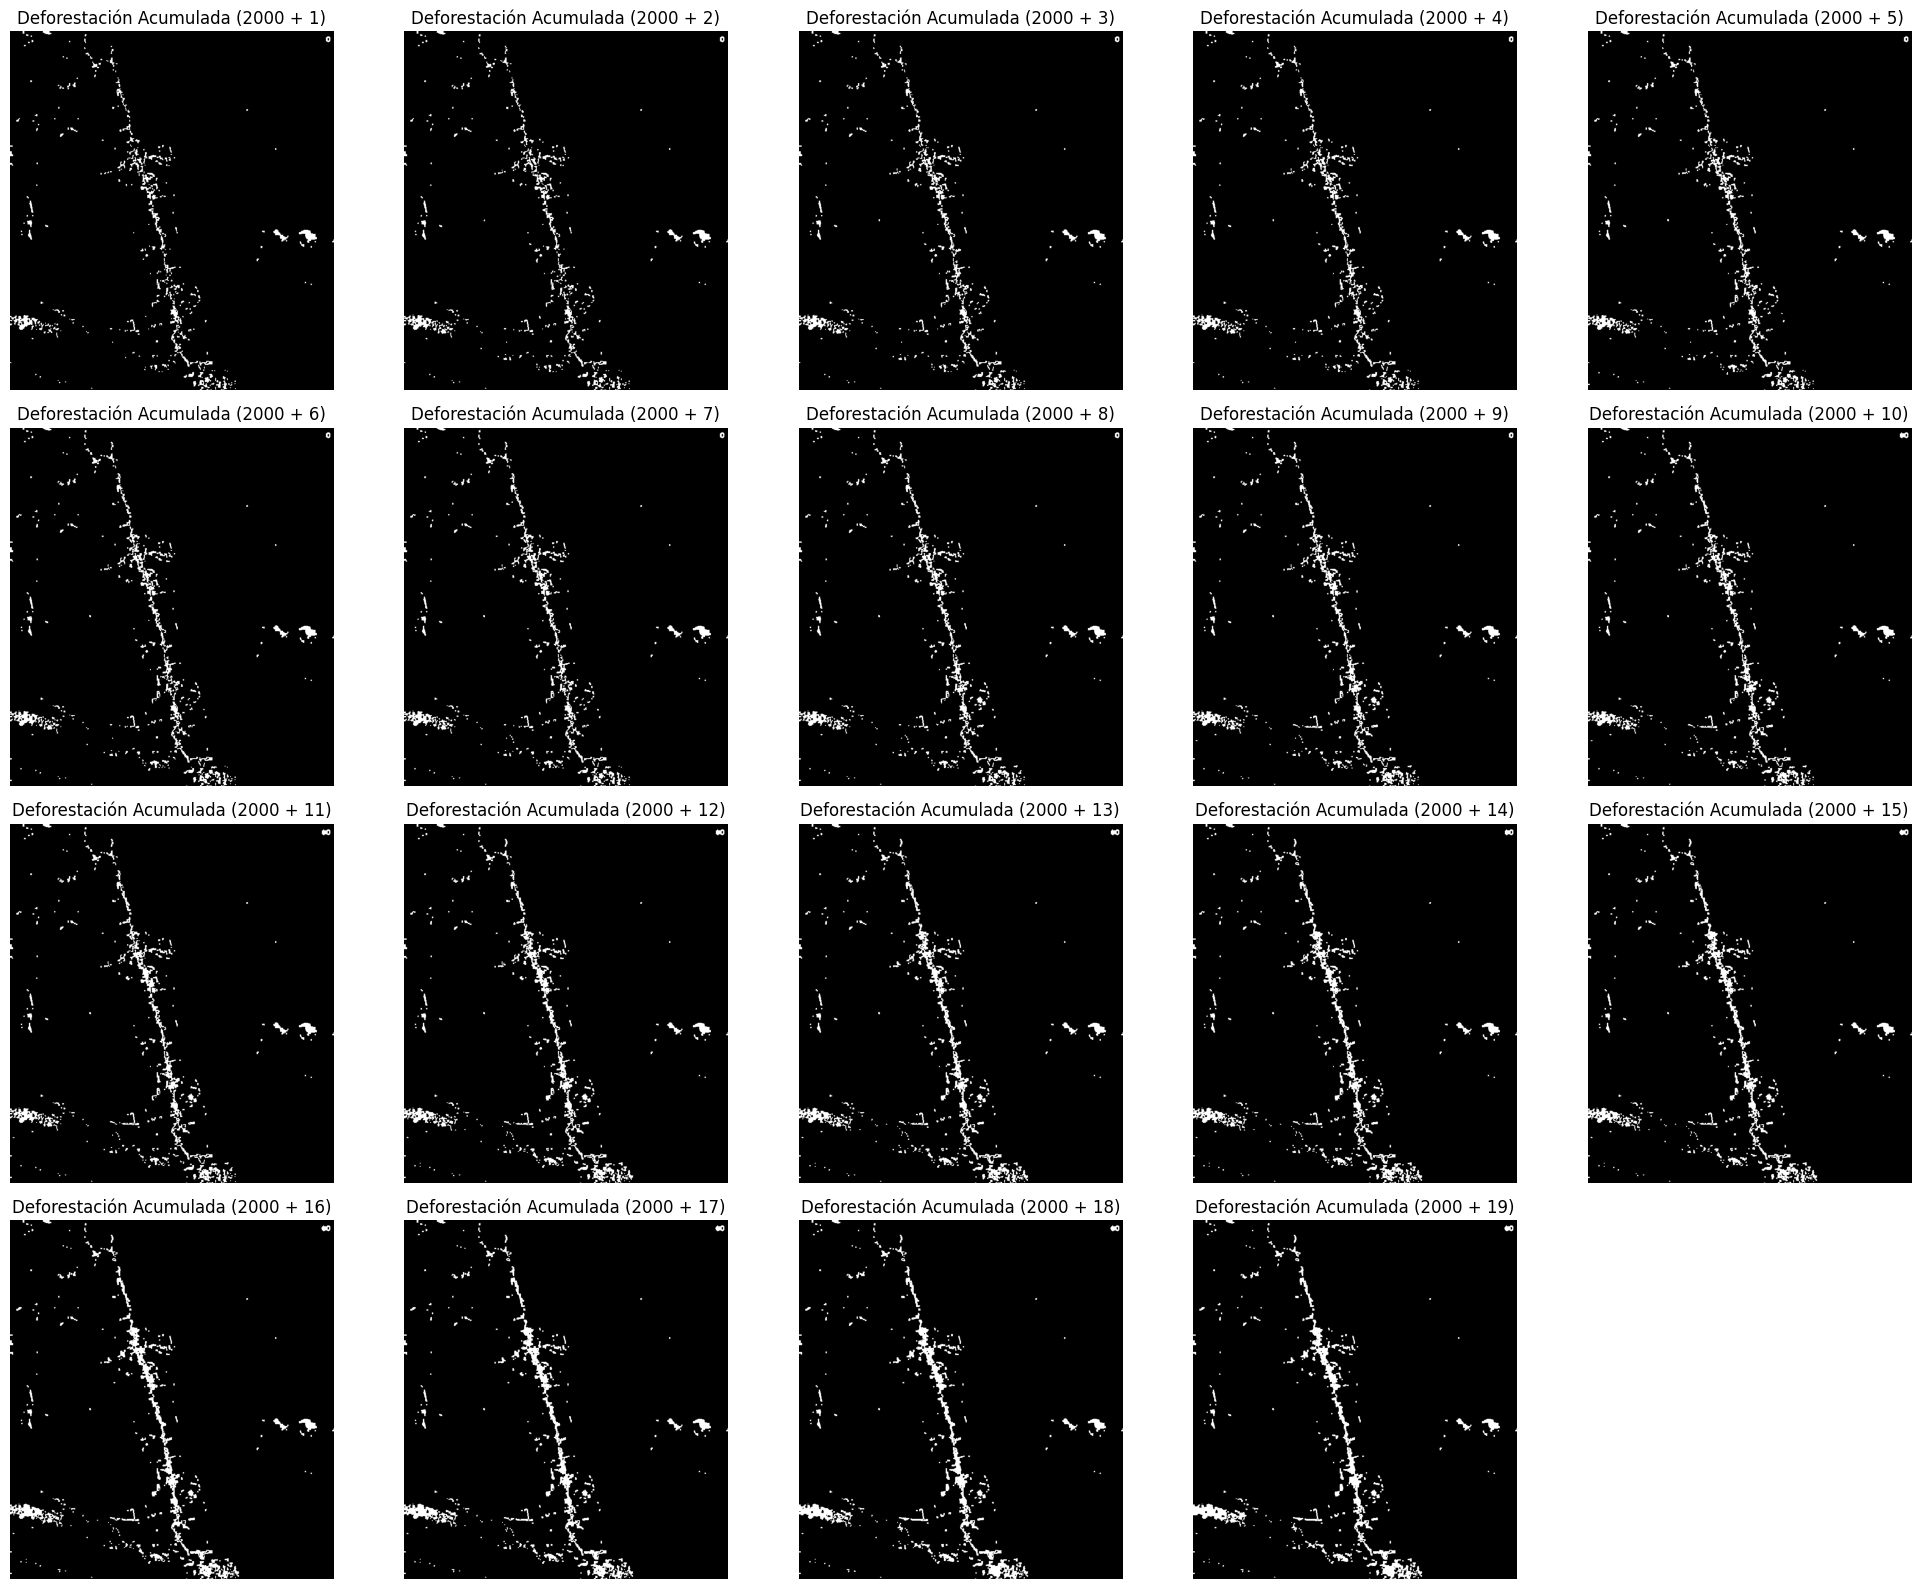

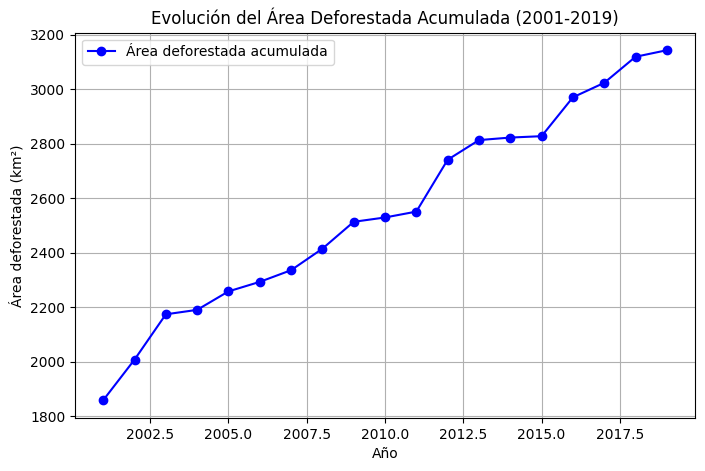

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. CONVERSIÓN A ESCALA DE GRISES + CLAHE
# --------------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_original]
images_clahe = [clahe.apply(gray) for gray in images_gray]

baseline = images_clahe[0]  # año 2000

# --------------------------------------------------
# 3. MÁSCARA DE BOSQUE EN EL AÑO 2000
#    (Para evitar contar áreas ya despejadas antes de 2000)
# --------------------------------------------------
_, forest_mask_2000 = cv2.threshold(baseline, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Si el bosque te sale negro (0), invierte la máscara:
# forest_mask_2000 = cv2.bitwise_not(forest_mask_2000)

# Suavizar un poco la máscara (opcional)
kernel = np.ones((3, 3), np.uint8)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_OPEN, kernel, iterations=1)
forest_mask_2000 = cv2.morphologyEx(forest_mask_2000, cv2.MORPH_CLOSE, kernel, iterations=1)

# --------------------------------------------------
# 4. MAPA ACUMULADO Y LISTAS DE ÁREAS
# --------------------------------------------------
cumulative_deforestation = np.zeros_like(baseline, dtype=np.uint8)
areas_deforestadas = []
cumulative_snapshots = []

# Escala (km² por píxel), ajústala a tu caso real
km_per_pixel = 0.154

# --------------------------------------------------
# 5. FUNCIÓN AUXILIAR PARA EXTRAER "CAMBIOS" ENTRE DOS IMÁGENES
# --------------------------------------------------
def get_diff_mask(img_a, img_b, mask_forest):
    """
    Devuelve la máscara binaria de las zonas que cambian de bosque a no-bosque
    al comparar 'img_a' con 'img_b'. Solo se considera 'mask_forest'.
    """
    diff = cv2.absdiff(img_a, img_b)
    diff_blur = cv2.GaussianBlur(diff, (5, 5), 0)
    
    _, diff_otsu = cv2.threshold(diff_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    masked = cv2.bitwise_and(diff_otsu, mask_forest)
    
    # Operaciones morfológicas (con kernel pequeño para no destruir zonas relevantes)
    kernel_small = np.ones((2, 2), np.uint8)
    # Prueba con fewer iterations
    closed = cv2.morphologyEx(masked, cv2.MORPH_CLOSE, kernel_small, iterations=1)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_small, iterations=1)
    return opened

# --------------------------------------------------
# 6. BUCLE PRINCIPAL: AÑO i (2001--2019)
#    - COMPARAR i VS. BASELINE (2000)
#    - COMPARAR i VS. i-1
#    - UNIR AMBAS MÁSCARAS
# --------------------------------------------------
for i in range(1, len(images_clahe)):
    current_img = images_clahe[i]
    prev_img = images_clahe[i-1]
    
    # Cambios con respecto a baseline
    diff_mask_baseline = get_diff_mask(current_img, baseline, forest_mask_2000)
    
    # Cambios con respecto al año anterior
    diff_mask_yearly = get_diff_mask(current_img, prev_img, forest_mask_2000)
    
    # Unir ambas (OR)
    combined_diff = cv2.bitwise_or(diff_mask_baseline, diff_mask_yearly)
    
    # Acumular
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, combined_diff)
    
    # Cálculo de área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")
    
    # Guardar snapshot
    cumulative_snapshots.append(cumulative_deforestation.copy())

# --------------------------------------------------
# 7. VISUALIZAR TODAS LAS IMÁGENES
# --------------------------------------------------
num_years = len(cumulative_snapshots)
cols = 5
rows = int(np.ceil(num_years / cols))

plt.figure(figsize=(4*cols, 4*rows))
for idx, snap in enumerate(cumulative_snapshots):
    plt.subplot(rows, cols, idx+1)
    plt.imshow(snap, cmap='gray')
    plt.title(f"Deforestación Acumulada (2000 + {idx+1})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 8. GRÁFICA DE EVOLUCIÓN
# --------------------------------------------------
years = [2001 + i for i in range(num_years)]
plt.figure(figsize=(8,5))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 224.07 km²
Año 2002: Área deforestada acumulada = 348.35 km²
Año 2003: Área deforestada acumulada = 368.21 km²
Año 2004: Área deforestada acumulada = 425.35 km²
Año 2005: Área deforestada acumulada = 660.04 km²
Año 2006: Área deforestada acumulada = 1040.73 km²
Año 2007: Área deforestada acumulada = 1139.45 km²
Año 2008: Área deforestada acumulada = 1713.40 km²
Año 2009: Área deforestada acumulada = 2013.09 km²
Año 2010: Área deforestada acumulada = 2235.00 km²
Año 2011: Área deforestada acumulada = 2785.55 km²
Año 2012: Área deforestada acumulada = 2872.10 km²
Año 2013: Área deforestada acumulada = 2990.99 km²
Año 2014: Área deforestada acumulada = 3004.08 km²
Año 2015: Área deforestada acumulada = 3007.00 km²
Año 2016: Área deforestada acumulada = 3201.20 km²
Año 2017: Área deforestada acumulada = 4417.80 km²
Año 2018: Área deforestada acumulada = 4854.54 km²
Año 2019: Área deforestada acumulada = 4989.60 km²


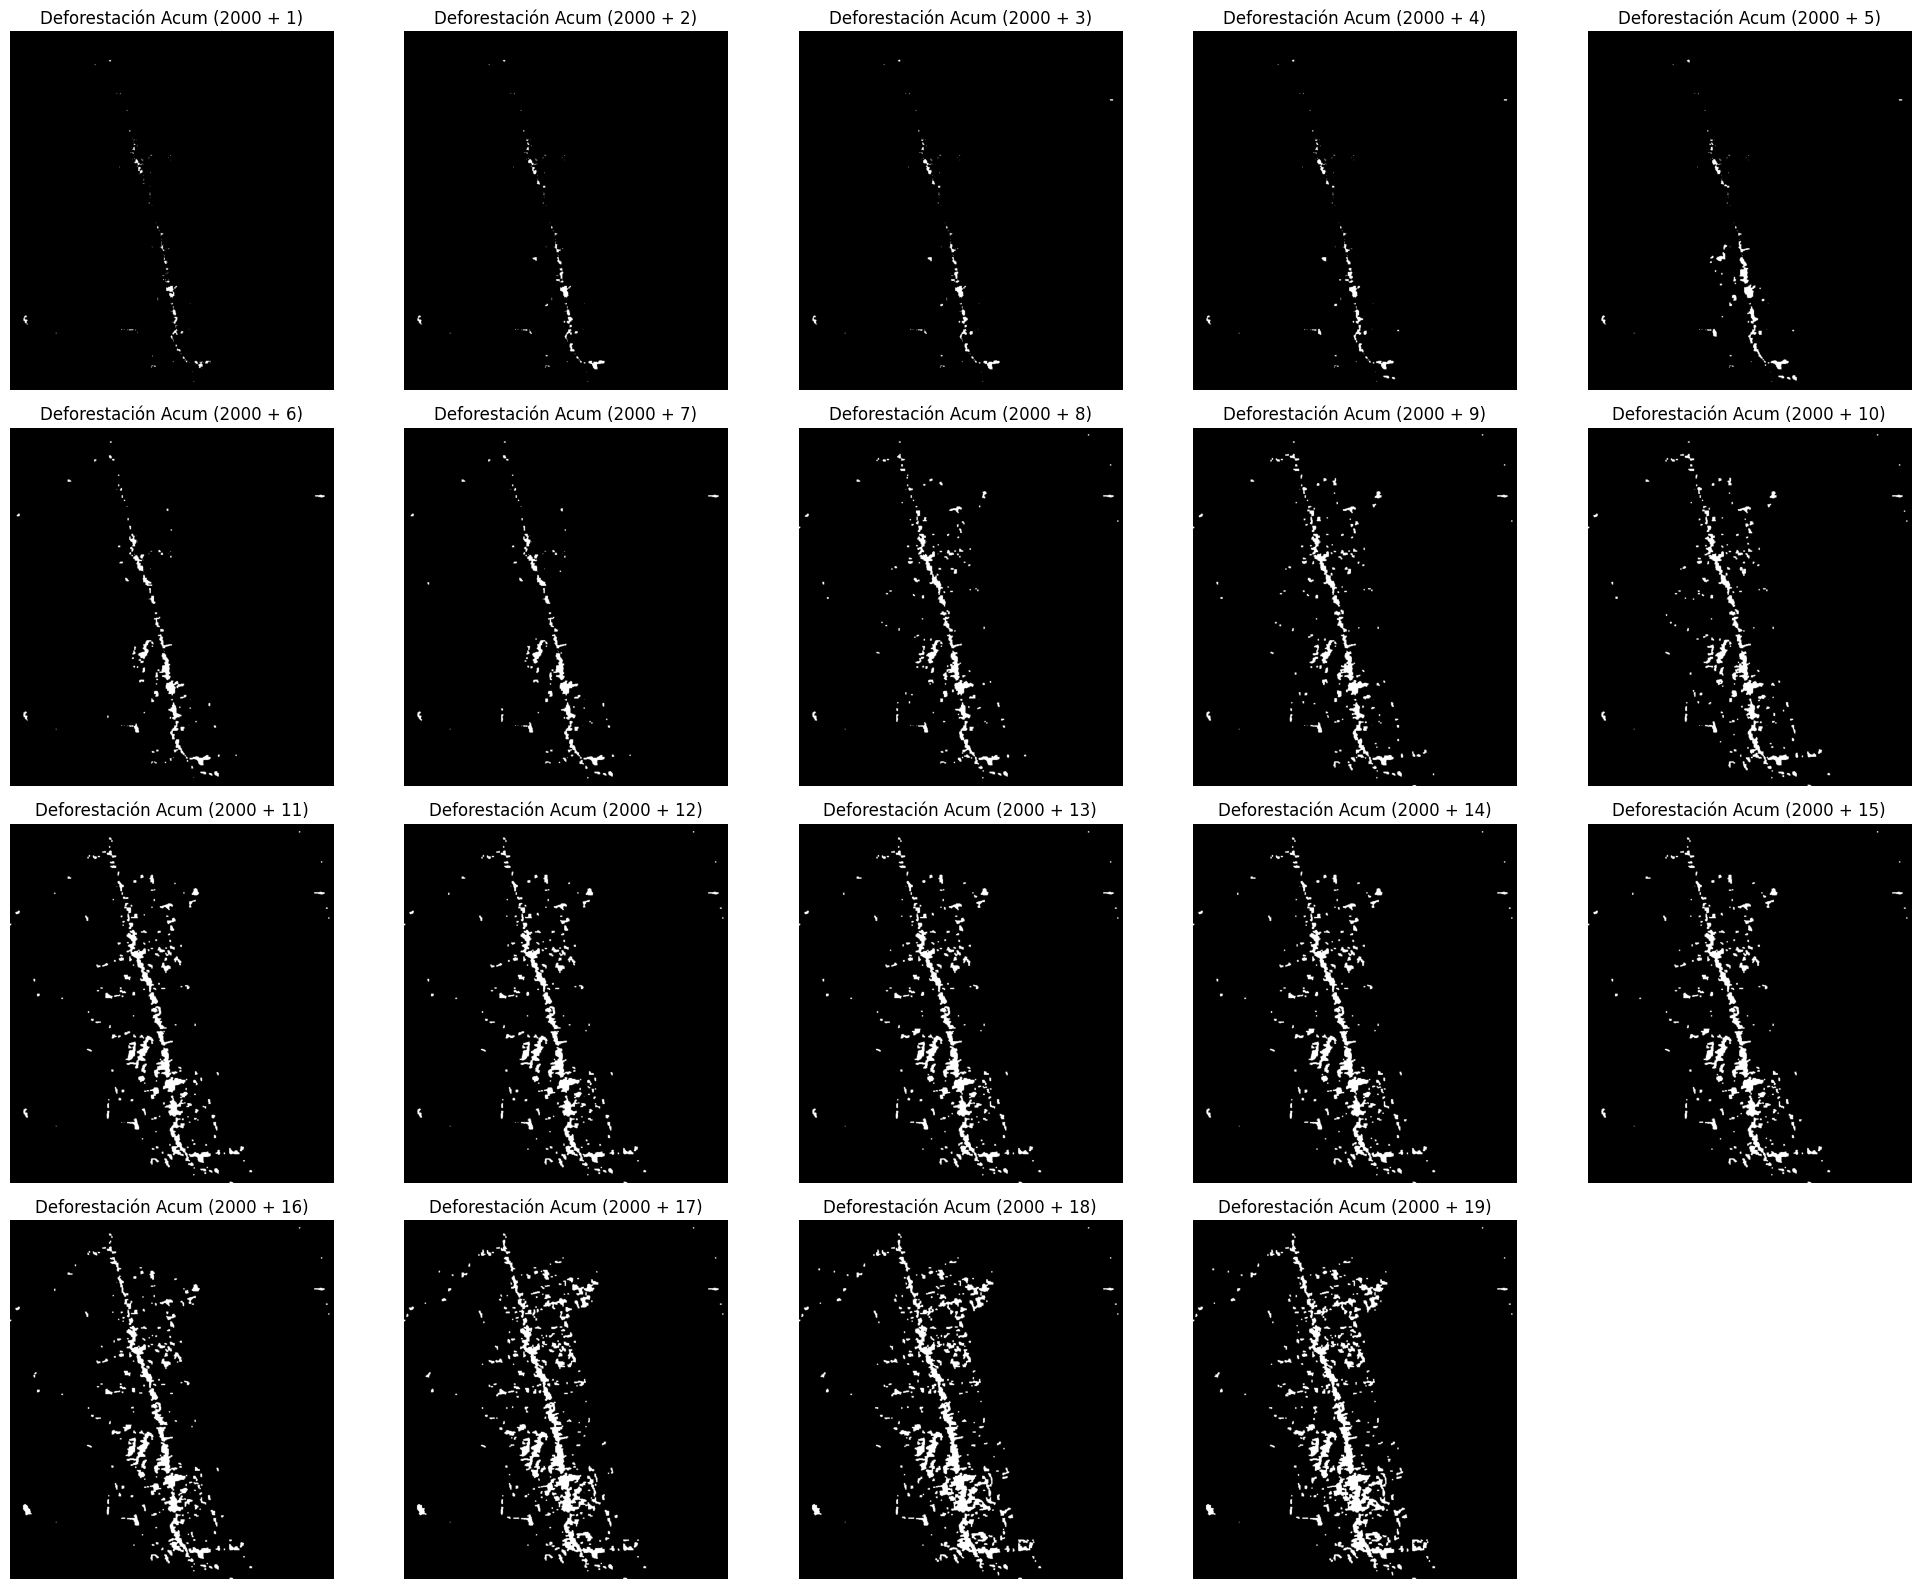

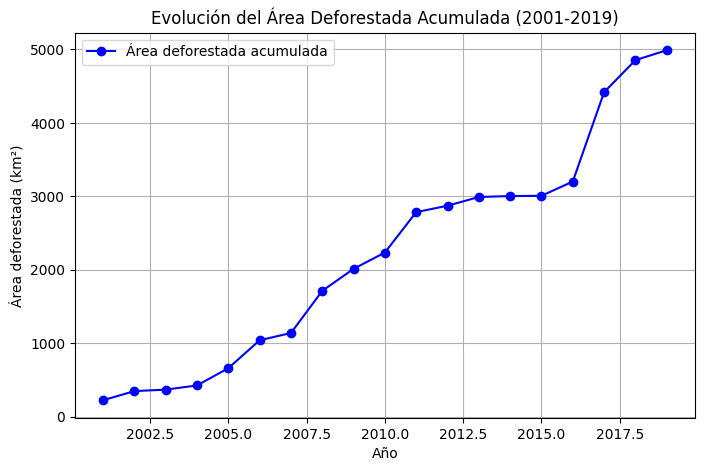

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. DEFINICIÓN DE RANGOS DE COLOR (HSV)
#    Se buscan tonos marrones para distinguir la zona deforestada.
#    Ajustar estos valores según tu imagen real.
# --------------------------------------------------
# Hue ~ 10-25 suele corresponder a marrones y naranjas claros
brownLower = np.array([10, 70, 30], dtype="uint8")   # (H=10, S=70, V=30) - Mínimo
brownUpper = np.array([25, 255, 220], dtype="uint8") # (H=25, S=255, V=220) - Máximo

# --------------------------------------------------
# 3. CONVERSIÓN A HSV Y CREACIÓN DE "IMÁGENES MARRONES"
# --------------------------------------------------
images_hsv = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images_original]

# Generamos máscaras “marrones” para cada imagen
masks_brown = []
for hsv_img in images_hsv:
    # Extrae la región que cae dentro del rango marrón
    mask = cv2.inRange(hsv_img, brownLower, brownUpper)
    masks_brown.append(mask)

# --------------------------------------------------
# 4. BASELINE (AÑO 2000) + MÁSCARA DE BOSQUE
#    (Opcional: si quieres evitar contar zonas que no eran bosque en 2000)
# --------------------------------------------------
baseline_brown = masks_brown[0]  # año 2000
# Si deseas combinar con la idea de "bosque en 2000", podrías
# hacer una inversión o usar la imagen en verde. Este ejemplo
# se centra en la detección de marrones, asumiendo que
# la zona marrón en 2000 es la deforestación inicial.

# --------------------------------------------------
# 5. COMBINAR COMPARACIÓN (i vs. 2000) Y (i vs. i-1),
#    PERO BASADA EN MÁSCARAS MARRONES.
# --------------------------------------------------
cumulative_deforestation = np.zeros_like(baseline_brown, dtype=np.uint8)
areas_deforestadas = []
cumulative_snapshots = []

# Parámetro de escala (ajústalo a tu caso)
km_per_pixel = 0.154

def combine_brown_masks(i, baseline_mask, prev_mask, current_mask):
    """
    Devuelve una máscara que represente los píxeles marrones 'nuevos'
    detectados tanto vs. baseline como vs. la imagen anterior.
    """
    # OR con baseline (año 2000) y con la imagen anterior:
    #   baseline_diff = current_mask OR baseline_mask
    #   yearly_diff   = current_mask OR prev_mask
    # Pero si queremos ver la *nueva* deforestación,
    # podríamos restar la porción ya detectada.
    
    # EJEMPLO: combinamos OR de baseline y OR de (i-1)
    mask_vs_baseline = cv2.bitwise_or(current_mask, baseline_mask)
    mask_vs_yearly   = cv2.bitwise_or(current_mask, prev_mask)
    
    combined = cv2.bitwise_or(mask_vs_baseline, mask_vs_yearly)
    
    # Pequeñas operaciones morfológicas para limpiar
    kernel_small = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(combined, cv2.MORPH_CLOSE, kernel_small, iterations=1)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_small, iterations=1)
    return opened

# Mapa de "deforestación" marrón en baseline
# (asumiendo que en 2000 ya hay algo de marrón visible).
cumulative_deforestation = masks_brown[0].copy()

for i in range(1, len(masks_brown)):
    current_mask = masks_brown[i]
    prev_mask = masks_brown[i-1]
    
    # Combinar la comparación actual vs. baseline, y vs. i-1
    new_deforestation = combine_brown_masks(i, baseline_brown, prev_mask, current_mask)
    
    # Acumularlo
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, new_deforestation)
    
    # Calcular área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")
    cumulative_snapshots.append(cumulative_deforestation.copy())

# --------------------------------------------------
# 6. VISUALIZAR TODAS LAS ETAPAS
# --------------------------------------------------
num_years = len(cumulative_snapshots)
cols = 5
rows = int(np.ceil(num_years / cols))

plt.figure(figsize=(4*cols, 4*rows))
for idx, snap in enumerate(cumulative_snapshots):
    plt.subplot(rows, cols, idx+1)
    plt.imshow(snap, cmap='gray')
    plt.title(f"Deforestación Acum (2000 + {idx+1})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 7. GRAFICAR EVOLUCIÓN
# --------------------------------------------------
years = [2001 + i for i in range(num_years)]
plt.figure(figsize=(8,5))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada Acumulada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 664.66 km²
Año 2002: Área deforestada acumulada = 863.48 km²
Año 2003: Área deforestada acumulada = 908.75 km²
Año 2004: Área deforestada acumulada = 1049.20 km²
Año 2005: Área deforestada acumulada = 1453.91 km²
Año 2006: Área deforestada acumulada = 2173.71 km²
Año 2007: Área deforestada acumulada = 2380.22 km²
Año 2008: Área deforestada acumulada = 3524.60 km²
Año 2009: Área deforestada acumulada = 3971.35 km²
Año 2010: Área deforestada acumulada = 4238.70 km²
Año 2011: Área deforestada acumulada = 5181.64 km²
Año 2012: Área deforestada acumulada = 5298.99 km²
Año 2013: Área deforestada acumulada = 5539.38 km²
Año 2014: Área deforestada acumulada = 5579.88 km²
Año 2015: Área deforestada acumulada = 5586.20 km²
Año 2016: Área deforestada acumulada = 6096.71 km²
Año 2017: Área deforestada acumulada = 7599.28 km²
Año 2018: Área deforestada acumulada = 7959.18 km²
Año 2019: Área deforestada acumulada = 8179.86 km²


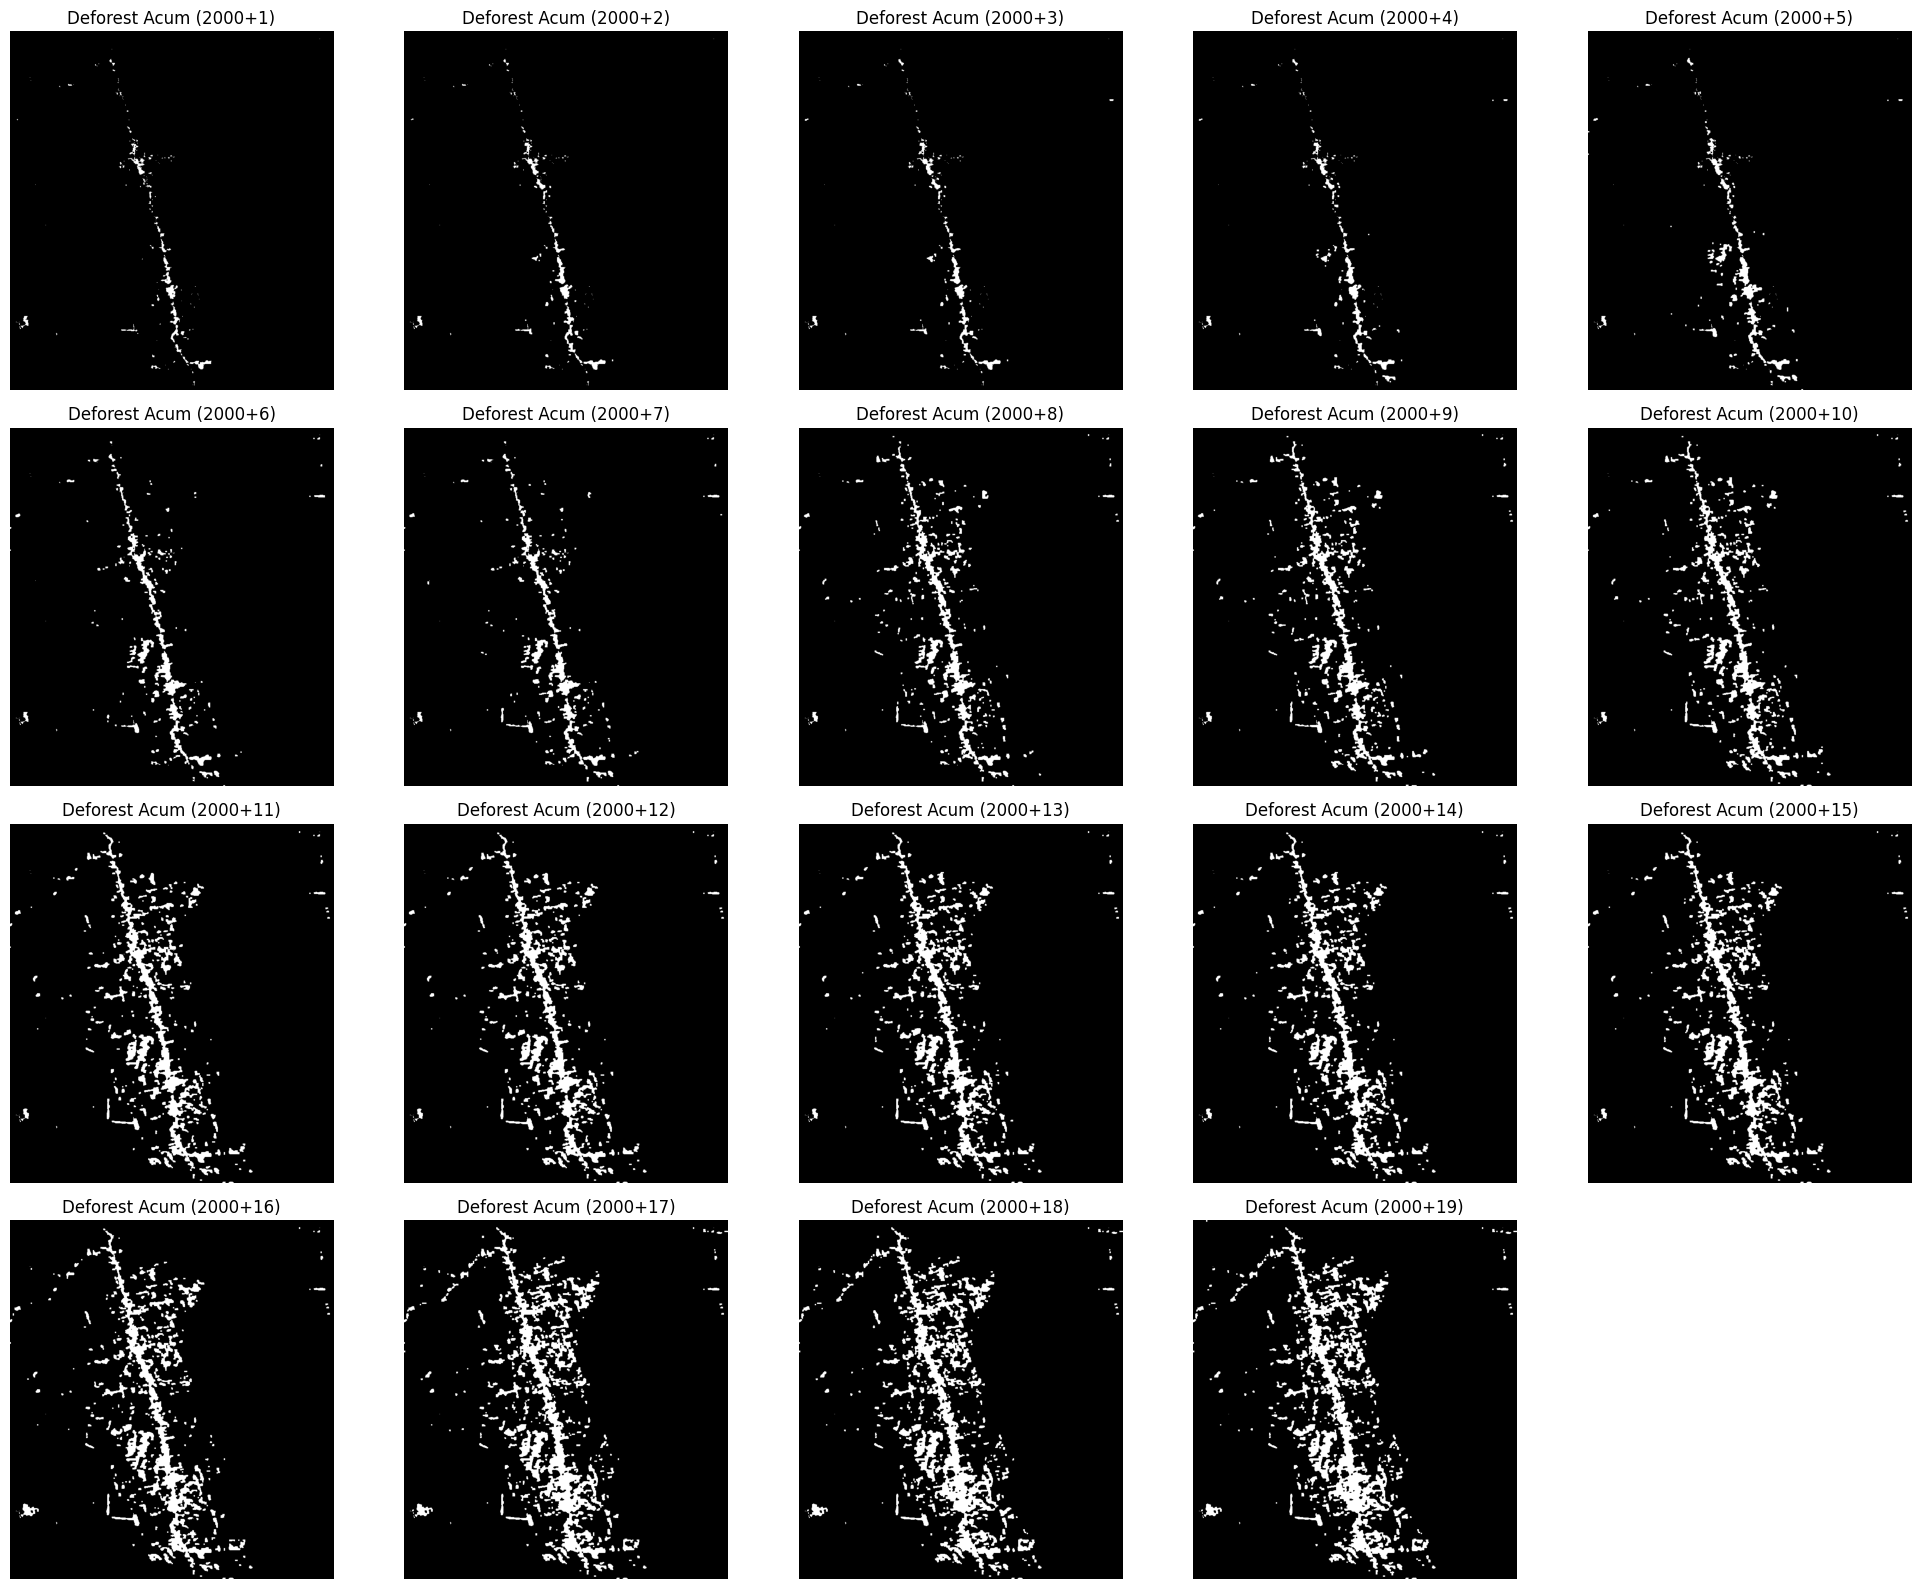

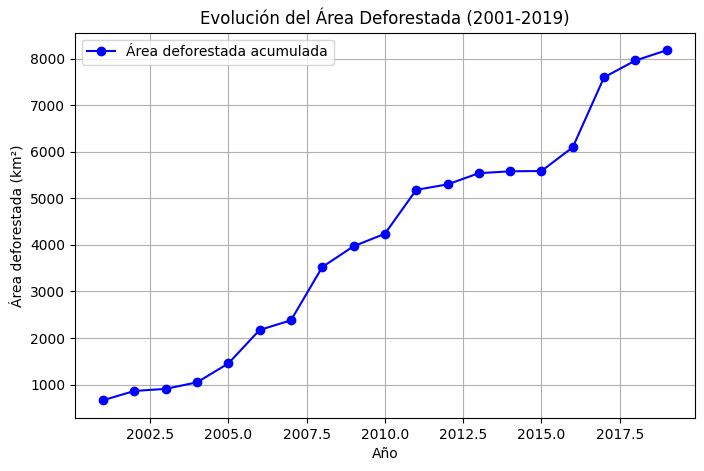

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# 1. LECTURA DE IMÁGENES
# --------------------------------------------------
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica la ruta y los archivos.")

# --------------------------------------------------
# 2. DEFINIR RANGO "MARRÓN" (AMPLIADO) Y CONVERTIR A HSV
# --------------------------------------------------
brownLower = np.array([5, 50, 20], dtype="uint8")   # Más bajo en H, S, V
brownUpper = np.array([30, 255, 255], dtype="uint8") # Más amplio en H hasta 30 y V hasta 255

images_hsv = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images_original]

# --------------------------------------------------
# 3. MÁSCARAS DE MARRÓN PARA TODAS LAS IMÁGENES
# --------------------------------------------------
masks_brown = [cv2.inRange(hsv_img, brownLower, brownUpper) for hsv_img in images_hsv]

# --------------------------------------------------
# 4. PROCESAR ESPECIALMENTE EL AÑO 2000 PARA INICIALIZAR
# --------------------------------------------------
# El primer fotograma es año 2000
baseline_brown = masks_brown[0].copy()

# Ejemplo de filtrado morfológico más leve:
kernel_init = np.ones((2, 2), np.uint8)
baseline_brown = cv2.morphologyEx(baseline_brown, cv2.MORPH_CLOSE, kernel_init, iterations=1)
# Podrías omitir la operación OPEN si no hay demasiado ruido
# baseline_brown = cv2.morphologyEx(baseline_brown, cv2.MORPH_OPEN, kernel_init, iterations=1)

# De este modo, "baseline_brown" retiene la mayor parte de píxeles marrones del año 2000.

# --------------------------------------------------
# 5. MAPA DE DEFORESTACIÓN ACUMULADA
# --------------------------------------------------
# Inicializamos con el marrón del año 2000
cumulative_deforestation = baseline_brown.copy()
areas_deforestadas = []
cumulative_snapshots = []

# Ajustar tu factor de escala:
km_per_pixel = 0.154

# --------------------------------------------------
# 6. FUNCIÓN PARA PROCESAR AÑOS SUBSIGUIENTES
# --------------------------------------------------
def refine_mask(marron_mask):
    """
    Aplica un filtrado morfológico razonable para descartar ruido
    y unificar parches pequeños.
    """
    kernel_small = np.ones((3, 3), np.uint8)
    closed = cv2.morphologyEx(marron_mask, cv2.MORPH_CLOSE, kernel_small, iterations=1)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_small, iterations=1)
    return opened

# --------------------------------------------------
# 7. ACUMULAR MARRÓN DE AÑOS POSTERIORES
#    (Versión simple: OR de la máscara actual con la acumulada)
# --------------------------------------------------
for i in range(1, len(masks_brown)):
    current_mask = masks_brown[i]
    
    # Filtrado morfológico normal para años > 2000
    refined = refine_mask(current_mask)
    
    # OR con lo ya acumulado
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, refined)
    
    # Cálculo de área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")
    cumulative_snapshots.append(cumulative_deforestation.copy())

# --------------------------------------------------
# 8. VISUALIZACIÓN
# --------------------------------------------------
num_years = len(cumulative_snapshots)
cols = 5
rows = int(np.ceil(num_years / cols))

plt.figure(figsize=(4*cols, 4*rows))
for idx, snap in enumerate(cumulative_snapshots):
    plt.subplot(rows, cols, idx+1)
    plt.imshow(snap, cmap='gray')
    plt.title(f"Deforest Acum (2000+{idx+1})")
    plt.axis('off')
plt.tight_layout()
plt.show()

# GRÁFICA
years = [2001 + i for i in range(num_years)]
plt.figure(figsize=(8,5))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área deforestada (km²)')
plt.grid(True)
plt.legend()
plt.show()


Año 2001: Área deforestada acumulada = 571.03 km²
Año 2002: Área deforestada acumulada = 776.93 km²
Año 2003: Área deforestada acumulada = 820.67 km²
Año 2004: Área deforestada acumulada = 963.58 km²
Año 2005: Área deforestada acumulada = 1380.46 km²
Año 2006: Área deforestada acumulada = 2133.36 km²
Año 2007: Área deforestada acumulada = 2339.57 km²
Año 2008: Área deforestada acumulada = 3482.25 km²
Año 2009: Área deforestada acumulada = 3932.39 km²
Año 2010: Área deforestada acumulada = 4200.20 km²
Año 2011: Área deforestada acumulada = 5144.83 km²
Año 2012: Área deforestada acumulada = 5258.79 km²
Año 2013: Área deforestada acumulada = 5498.11 km²
Año 2014: Área deforestada acumulada = 5537.38 km²
Año 2015: Área deforestada acumulada = 5543.54 km²
Año 2016: Área deforestada acumulada = 6047.27 km²
Año 2017: Área deforestada acumulada = 7530.60 km²
Año 2018: Área deforestada acumulada = 7891.73 km²
Año 2019: Área deforestada acumulada = 8107.48 km²


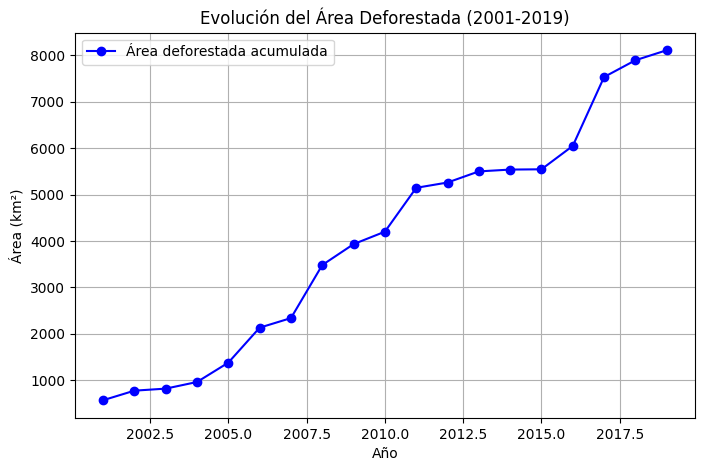

In [22]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Lectura de imágenes y conversión a HSV
image_files = [f'img/frame_{str(i).zfill(2)}.jpg' for i in range(20)]
images_original = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images_original.append(img)
    else:
        print(f"[WARN] No se pudo cargar la imagen: {file}")

if not images_original:
    raise FileNotFoundError("No se cargaron imágenes. Verifica rutas o directorios.")

# Conversión a HSV
images_hsv = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images_original]

# CLAHE: mejora del contraste en el canal de brillo (V)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
images_clahe = []
for hsv_img in images_hsv:
    h, s, v = cv2.split(hsv_img)
    v_eq = clahe.apply(v)
    hsv_eq = cv2.merge([h, s, v_eq])
    images_clahe.append(hsv_eq)

# Definir rango marrón para segmentación básica
brownLower = np.array([5, 50, 20], dtype="uint8")
brownUpper = np.array([30, 255, 255], dtype="uint8")

masks_brown = [cv2.inRange(eq_img, brownLower, brownUpper) for eq_img in images_clahe]

# Aplicación de Otsu Global y Otsu Adaptativo tras CLAHE
otsu_masks = []
adaptive_otsu_masks = []

for mask in masks_brown:
    # Umbralización global con Otsu
    _, otsu_mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_masks.append(otsu_mask)
    
    # Umbralización Otsu adaptativo (ventanas de 15x15 píxeles)
    adaptive_otsu_mask = cv2.adaptiveThreshold(
        mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
    adaptive_otsu_masks.append(adaptive_otsu_mask)

# Filtrado morfológico: cierre y apertura
kernel_small = np.ones((3, 3), np.uint8)

def apply_morphology(mask):
    closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_small, iterations=1)
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel_small, iterations=1)
    return opened

refined_otsu_masks = [apply_morphology(mask) for mask in otsu_masks]
refined_adaptive_otsu_masks = [apply_morphology(mask) for mask in adaptive_otsu_masks]

# Inicialización de la máscara acumulada
baseline_brown = refined_otsu_masks[0].copy()
cumulative_deforestation = baseline_brown.copy()

# Escala en km² por píxel
km_per_pixel = 0.154

areas_deforestadas = []

for i in range(1, len(refined_otsu_masks)):
    # Seleccionar máscara de Otsu (puedes cambiar a la adaptativa si se requiere)
    current_mask = refined_otsu_masks[i]
    
    # Acumulación de deforestación
    cumulative_deforestation = cv2.bitwise_or(cumulative_deforestation, current_mask)
    
    # Cálculo del área
    num_white_pixels = cv2.countNonZero(cumulative_deforestation)
    area_deforestada = num_white_pixels * km_per_pixel
    areas_deforestadas.append(area_deforestada)
    print(f"Año {2000 + i}: Área deforestada acumulada = {area_deforestada:.2f} km²")

# Visualización de resultados
years = [2001 + i for i in range(len(areas_deforestadas))]
plt.figure(figsize=(8, 5))
plt.plot(years, areas_deforestadas, marker='o', color='b', label='Área deforestada acumulada')
plt.title('Evolución del Área Deforestada (2001-2019)')
plt.xlabel('Año')
plt.ylabel('Área (km²)')
plt.grid(True)
plt.legend()
plt.show()
